# Predicting Average cost for two persons

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import OrdinalEncoder
import pickle
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
country_code =pd.read_excel(r'D:\Backup\Old PC\Chandan\Data Science\Internship\Final Project\Phase-3\Country-Code.xlsx', 
                            sheet_name ='Sheet1' )
zomato =pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Z_Restaurant/zomato.csv', encoding="ISO-8859-1")

In [3]:
country_code

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [4]:
zomato

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


__We found some junk characters in the data set. We will remove it.__

In [5]:
# Removint junk characters
zomato = zomato.replace(r'[^0-9a-zA-Z ]', '', regex=True).replace("'", '')

In [6]:
zomato

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,121.027535,14.565443,French Japanese Desserts,...,Botswana PulaP,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,121.014101,14.553708,Japanese,...,Botswana PulaP,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat Edsa ShangriLa,162,Mandaluyong City,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...,Edsa ShangriLa Ortigas Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City Mandal...,121.056831,14.581404,Seafood Asian Filipino Indian,...,Botswana PulaP,Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,Third Floor Mega Fashion Hall SM Megamall Orti...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.056475,14.585318,Japanese Sushi,...,Botswana PulaP,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,Third Floor Mega Atrium SM Megamall Ortigas Ma...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.057508,14.584450,Japanese Korean,...,Botswana PulaP,Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,stanbul,Kemanke Karamustafa Paa Mahallesi Rhtm Caddesi...,Karaky,Karaky stanbul,28.977392,41.022793,Turkish,...,Turkish LiraTL,No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac,208,stanbul,Kouyolu Mahallesi Muhittin stnda Caddesi No 85...,Kouyolu,Kouyolu stanbul,29.041297,41.009847,World Cuisine Patisserie Cafe,...,Turkish LiraTL,No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,Kurueme Mahallesi Muallim Naci Caddesi No 56 B...,Kurueme,Kurueme stanbul,29.034640,41.055817,Italian World Cuisine,...,Turkish LiraTL,No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,stanbul,Kurueme Mahallesi Muallim Naci Caddesi No 64B ...,Kurueme,Kurueme stanbul,29.036019,41.057979,Restaurant Cafe,...,Turkish LiraTL,No,No,No,No,4,4.0,Green,Very Good,901


In [7]:
country_code.dtypes

Country Code     int64
Country         object
dtype: object

In [8]:
zomato.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [9]:
# Concatenating 2 dataset
df =zomato.merge(country_code)
df =df.sample(frac =1)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
1969,18351822,Breakfast60,1,Gurgaon,801 Arihant CGHS Sector 56 Gurgaon,Sector 56,Sector 56 Gurgaon,0.000000,0.000000,Chinese North Indian South Indian Healthy Food,...,No,No,No,No,1,3.1,Orange,Average,6,India
5105,18424643,Asian House Restaurant,1,New Delhi,1st floor Asian Hotel New Aruna Nagar Majnu ka...,Majnu ka Tila,Majnu ka Tila New Delhi,77.228076,28.700845,Tibetan South Indian North Indian,...,No,No,No,No,1,0.0,White,Not rated,0,India
3857,18361755,Shudh Vaishno Dhaba,1,New Delhi,Near Indra Band Kingsway Camp GTB Nagar New Delhi,GTB Nagar,GTB Nagar New Delhi,77.204811,28.699069,North Indian,...,No,No,No,No,1,0.0,White,Not rated,0,India
2947,7634,Maa Tara,1,New Delhi,45 46 47 Market 2 Chittaranjan Park New Delhi,Chittaranjan Park,Chittaranjan Park New Delhi,77.253298,28.536231,Bengali North Indian,...,No,Yes,No,No,2,3.6,Yellow,Good,458,India
214,17334197,Five Guys Burgers and Fries,216,Dalton,1303 W Walnut Ave Dalton GA 30720,Dalton,Dalton Dalton,-84.990925,34.759273,Fast Food,...,No,No,No,No,1,4.1,Green,Very Good,142,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2240,18124368,Urban Dhaba,1,Gurgaon,Food Court Basement 1 Unitech Infospace Sector...,Unitech Infospace Sector 21 Gurgaon,Unitech Infospace Sector 21 Gurgaon Gurgaon,77.071466,28.509640,North Indian,...,No,Yes,No,No,2,3.2,Orange,Average,11,India
5238,309227,Caravan Resto Bar,1,New Delhi,A10 Acharya Niketan Mayur Vihar Phase 1 New Delhi,Mayur Vihar Phase 1,Mayur Vihar Phase 1 New Delhi,77.293835,28.607800,North Indian Chinese Mughlai,...,Yes,Yes,No,No,3,3.2,Orange,Average,51,India
794,123125,TGI Fridays,1,Chandigarh,SCO 51 Madhya Marg Sector 26 Chandigarh,Sector 26,Sector 26 Chandigarh,76.806363,30.724943,American TexMex,...,No,No,No,No,3,4.3,Green,Very Good,228,India
8147,309088,Kolkata Biryani House,1,Noida,138 Jaipuria Plaza Sector 26 Noida,Jaipuria Plaza Sector 26 Noida,Jaipuria Plaza Sector 26 Noida Noida,77.335279,28.576846,North Indian Mughlai Biryani,...,No,Yes,No,No,2,2.8,Orange,Average,109,India


In [10]:
df.shape

(9551, 22)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9551 entries, 1969 to 859
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu  95

__We have 9551 records and 22 columns. Out of 22 columns datatypes for the columns are object, int and float.__

In [12]:
# Checking null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

__Cuisines have 9 null values.__

In [13]:
# Checking count of each column.
for i in df:
    print(df[i].value_counts())

Restaurant ID
18351822    1
17303670    1
313185      1
18400746    1
9002        1
           ..
17334763    1
18217475    1
18466397    1
69          1
3500488     1
Name: count, Length: 9551, dtype: int64
Restaurant Name
Cafe Coffee Day           83
Dominos Pizza             79
Subway                    63
Green Chick Chop          51
McDonalds                 48
                          ..
ZaikaeDilli                1
Singh Terrace Grill        1
Sufiaana                   1
Punjabi Tandoori Tikka     1
Razzmatazz                 1
Name: count, Length: 7430, dtype: int64
Country Code
1      8652
216     434
215      80
214      60
189      60
30       60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64
City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Monroe                 1
Ojo Caliente      

In [14]:
# Filling null value
df['Cuisines'] =df['Cuisines'].fillna(df['Cuisines'].mode()[0])

In [15]:
# Again checking null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [16]:
# Checking unique records
df.nunique()

Restaurant ID           9551
Restaurant Name         7430
Country Code              15
City                     141
Address                 8899
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [17]:
# Deleting Restuarant ID, as it is just a record number
df.drop(columns =['Restaurant ID'], inplace =True)

In [18]:
# Checking Statistical health of the dataset
df.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


__Since We have currency for different countries in 'Average Cost for two', we will convert it to India Rupees.__

__WE are using below conversion rate.__

Dollar	                 83.24
Pounds	                 106
Brazilian RealR	         16.14
Emirati DiramAED	     22.66
RandR	                 4.5518
NewZealand	             51.02
Turkish LiraTL	         2.58
Botswana PulaP	         6.14
Indonesian RupiahIDR	 0.0052
Qatari RialQR	         22.86
Sri Lankan RupeeLKR	     0.28

In [19]:
df.loc[df['Currency'] =='Dollar', 'Average Cost for two'] =df['Average Cost for two'] * 83.24
df.loc[df['Currency'] =='Pounds', 'Average Cost for two'] =df['Average Cost for two'] * 106
df.loc[df['Currency'] =='Brazilian RealR', 'Average Cost for two'] =df['Average Cost for two'] * 16.14
df.loc[df['Currency'] =='Emirati DiramAED', 'Average Cost for two'] =df['Average Cost for two'] * 22.66
df.loc[df['Currency'] =='RandR', 'Average Cost for two'] =df['Average Cost for two'] * 4.5518
df.loc[df['Currency'] =='NewZealand', 'Average Cost for two'] =df['Average Cost for two'] * 51.02
df.loc[df['Currency'] =='Turkish LiraTL', 'Average Cost for two'] =df['Average Cost for two'] * 2.58
df.loc[df['Currency'] =='Botswana PulaP', 'Average Cost for two'] =df['Average Cost for two'] * 6.14
df.loc[df['Currency'] =='Indonesian RupiahIDR', 'Average Cost for two'] =df['Average Cost for two'] * 0.0052
df.loc[df['Currency'] =='Qatari RialQR', 'Average Cost for two'] =df['Average Cost for two'] * 22.86
df.loc[df['Currency'] =='Sri Lankan RupeeLKR', 'Average Cost for two'] =df['Average Cost for two'] * 0.28

In [20]:
# Seperating Numerical and categorical columns

# Seperating numerical columns
num_cols =[]
for i in df.dtypes.index:
    if df[i].dtypes =='float64':
        num_cols.append(i)
        
# Seperating categorical columns
cat_cols =[]
for i in df.dtypes.index:
    if df[i].dtypes =='object':
        cat_cols.append(i)
        
print("Numerical Columns are :", num_cols)
print("Categorical Columns are :", cat_cols)
print("No. of Numerical Columns are :", len(num_cols))
print("No. of Categorical Columns are :", len(cat_cols))

Numerical Columns are : ['Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating']
Categorical Columns are : ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']
No. of Numerical Columns are : 4
No. of Categorical Columns are : 14


# Univariate Analysis

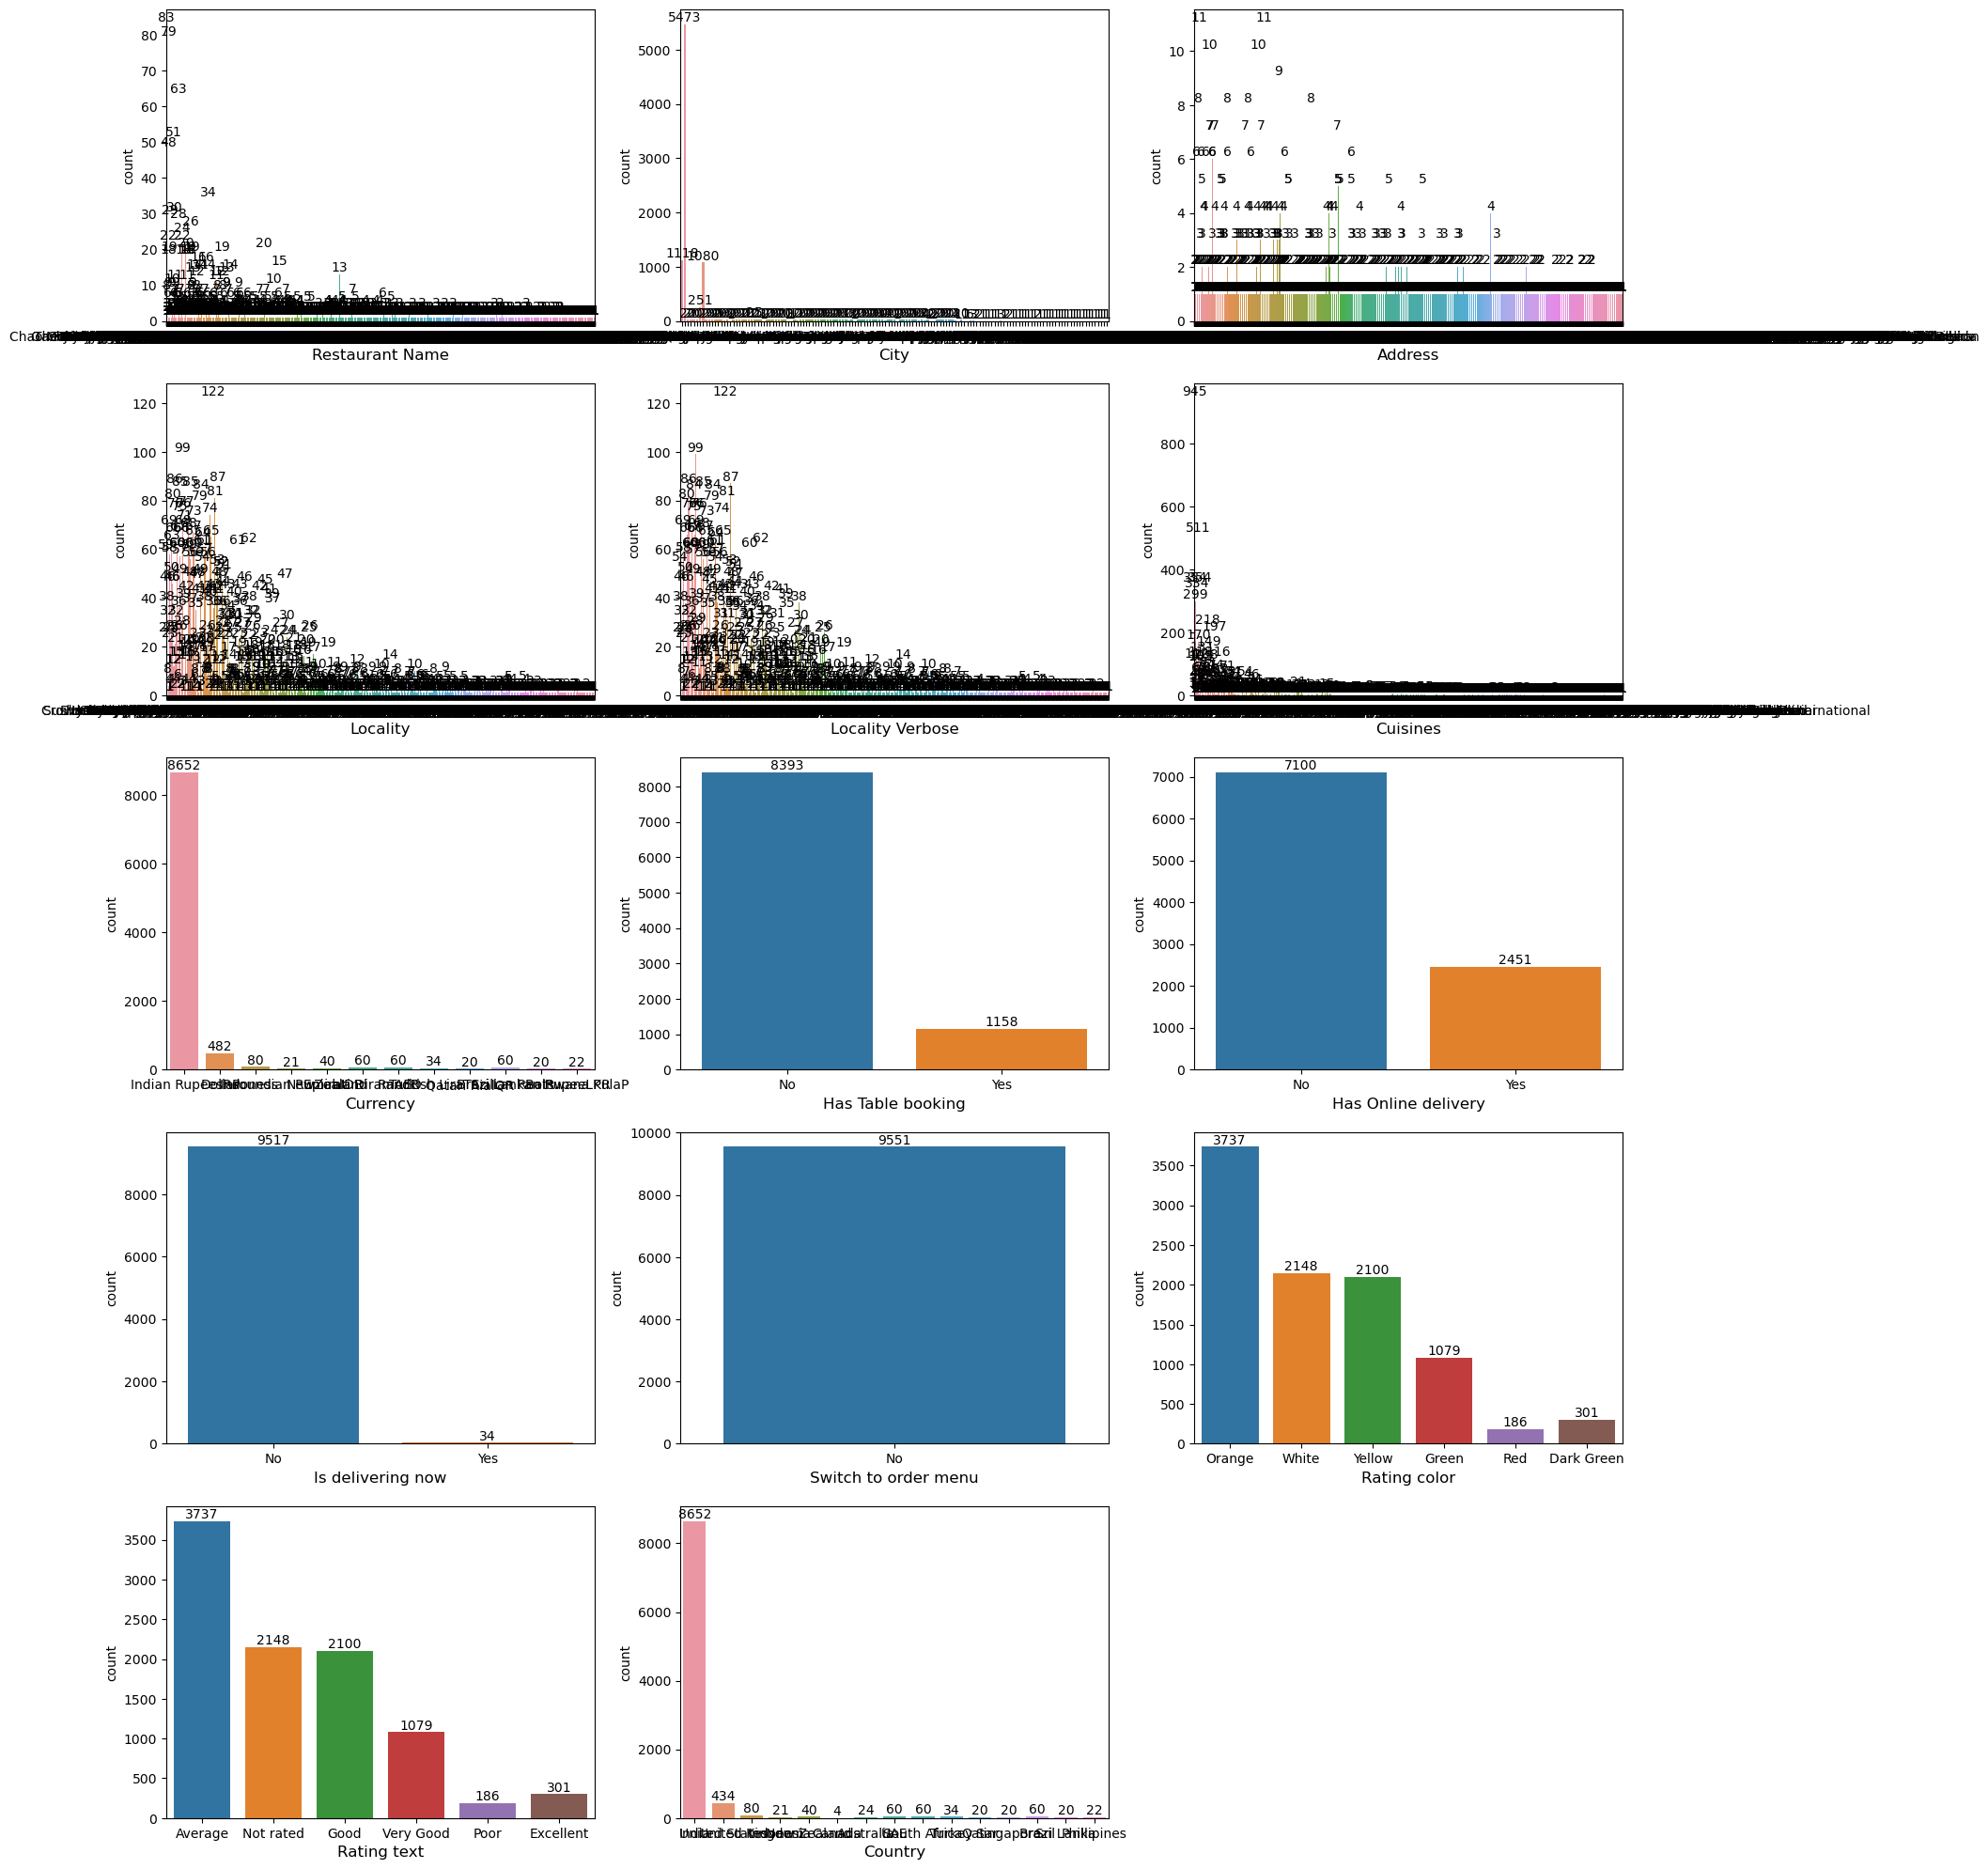

In [21]:
plt.figure(figsize =(20, 25))
plotnumber =1

for i in cat_cols:
    if plotnumber <= 14:
        plt.subplot(5, 3, plotnumber)
        ax =sns.countplot(x =i, data =df)
        ax.bar_label(ax.containers[0])
        plt.xlabel(i, fontsize =12)
    plotnumber+=1
plt.show()

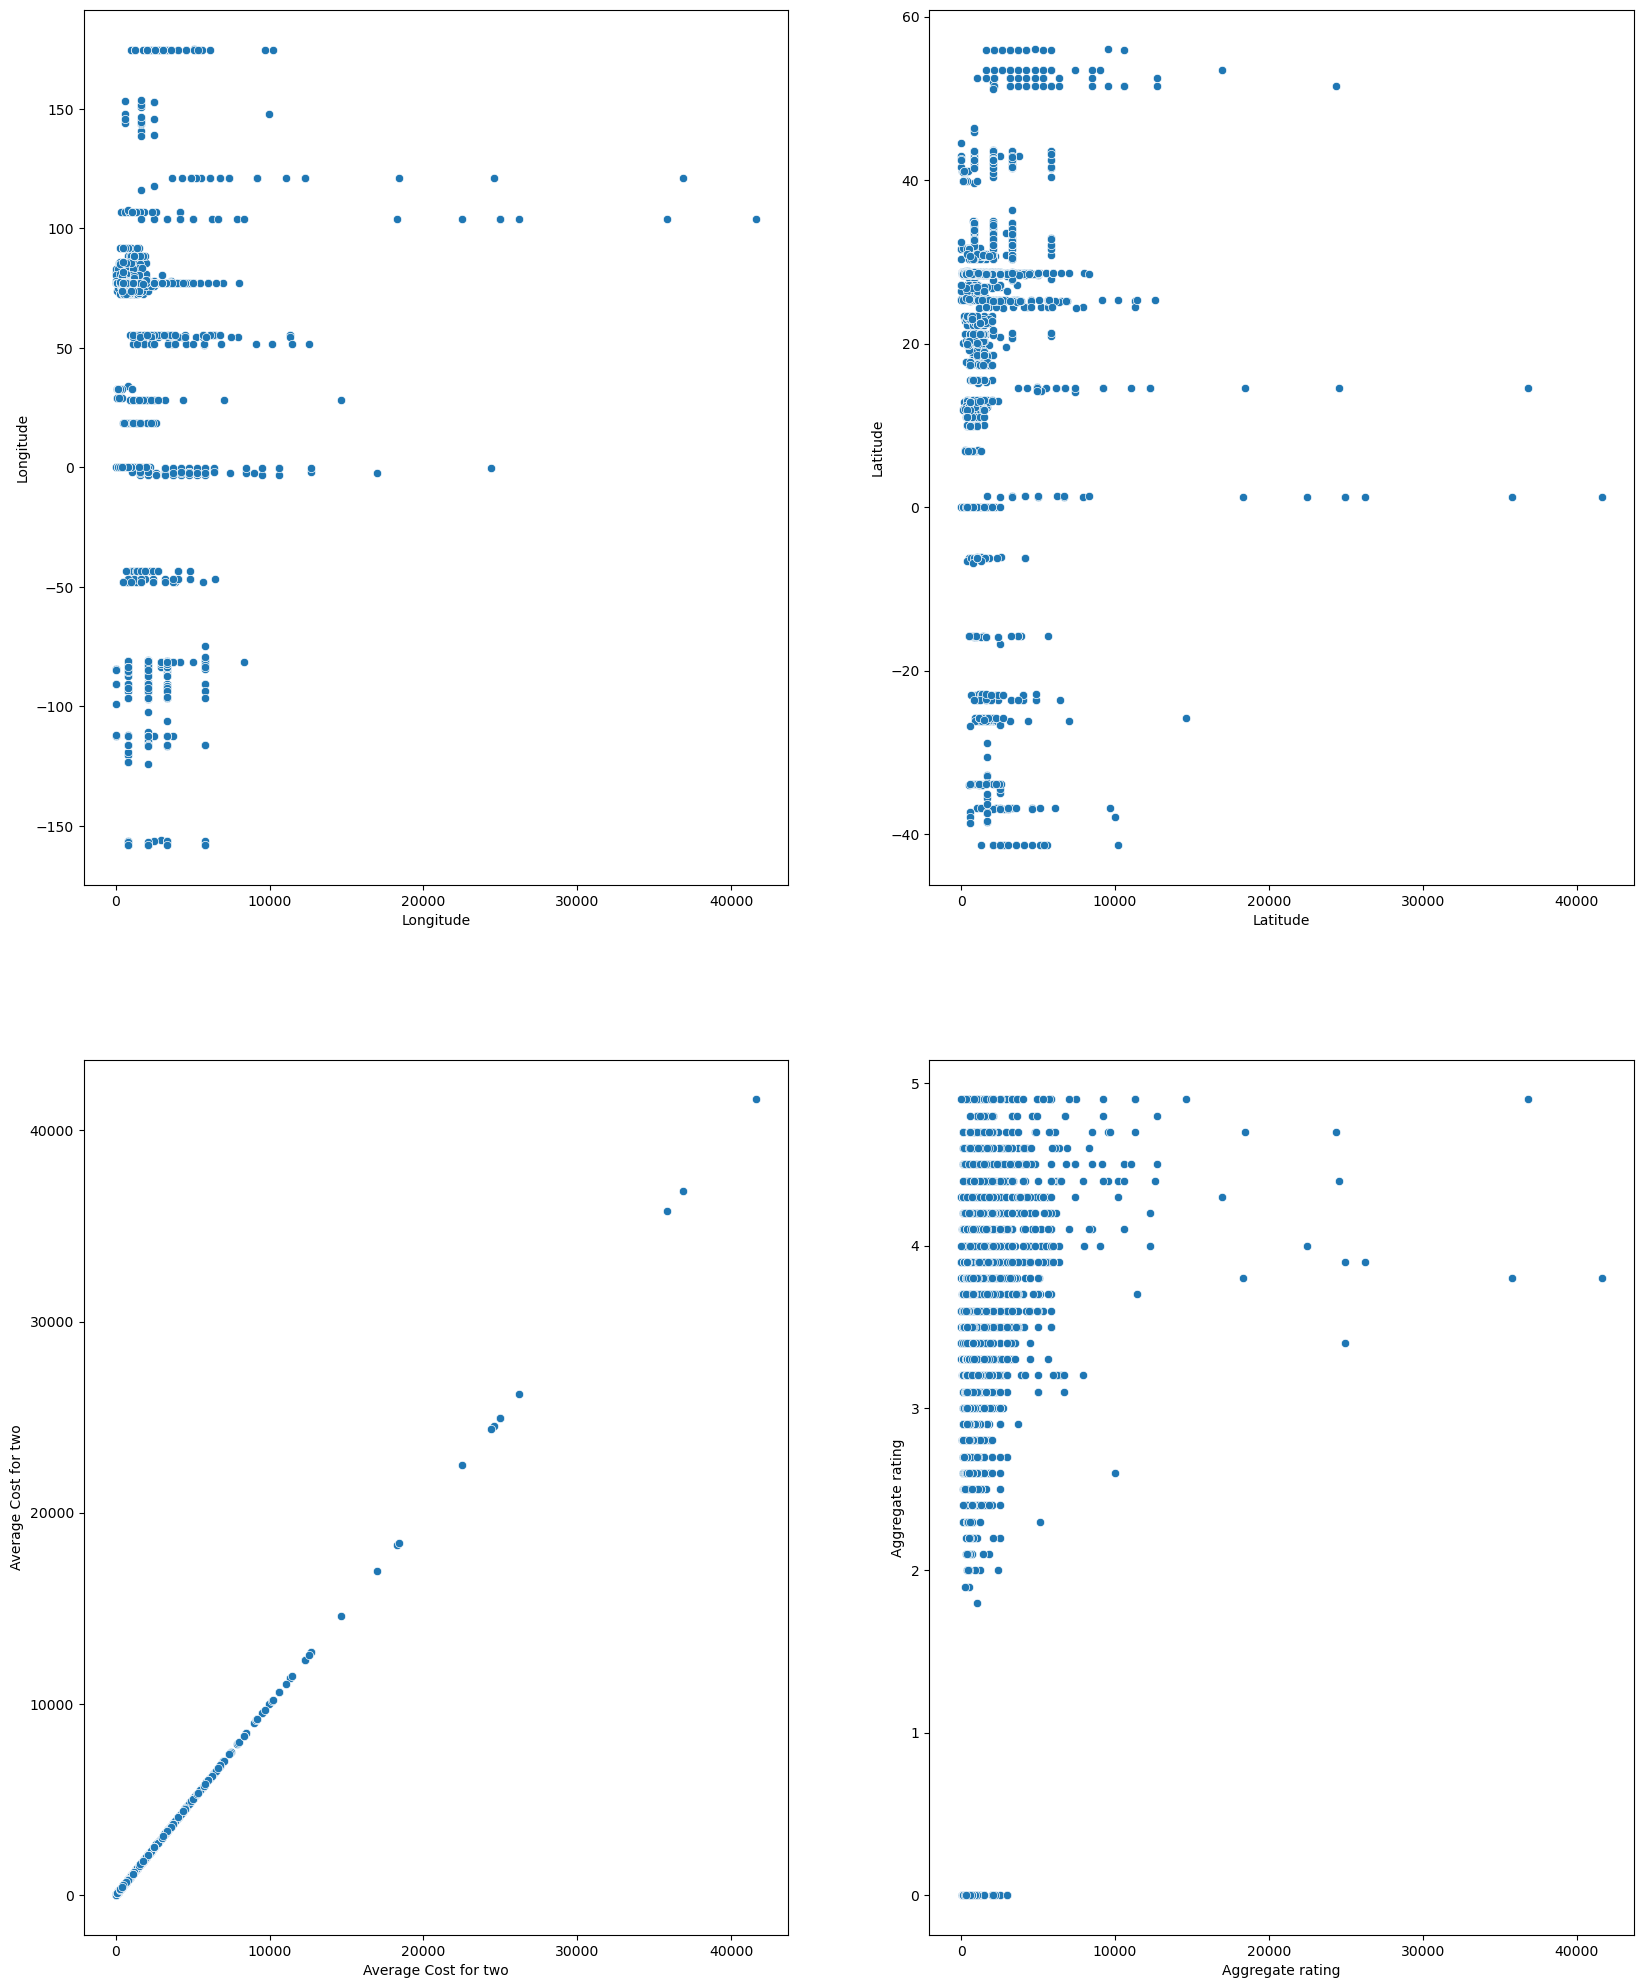

In [22]:
# Plotting scatter plot for numerical columns
plt.figure(figsize =(20, 25))
plotnumber =1

for i in num_cols:
    if plotnumber <= 4:
        plt.subplot(2, 2, plotnumber)
        sns.scatterplot(x ='Average Cost for two', y =i, data =df)
        plt.xlabel(i)
    plotnumber+=1
plt.show()

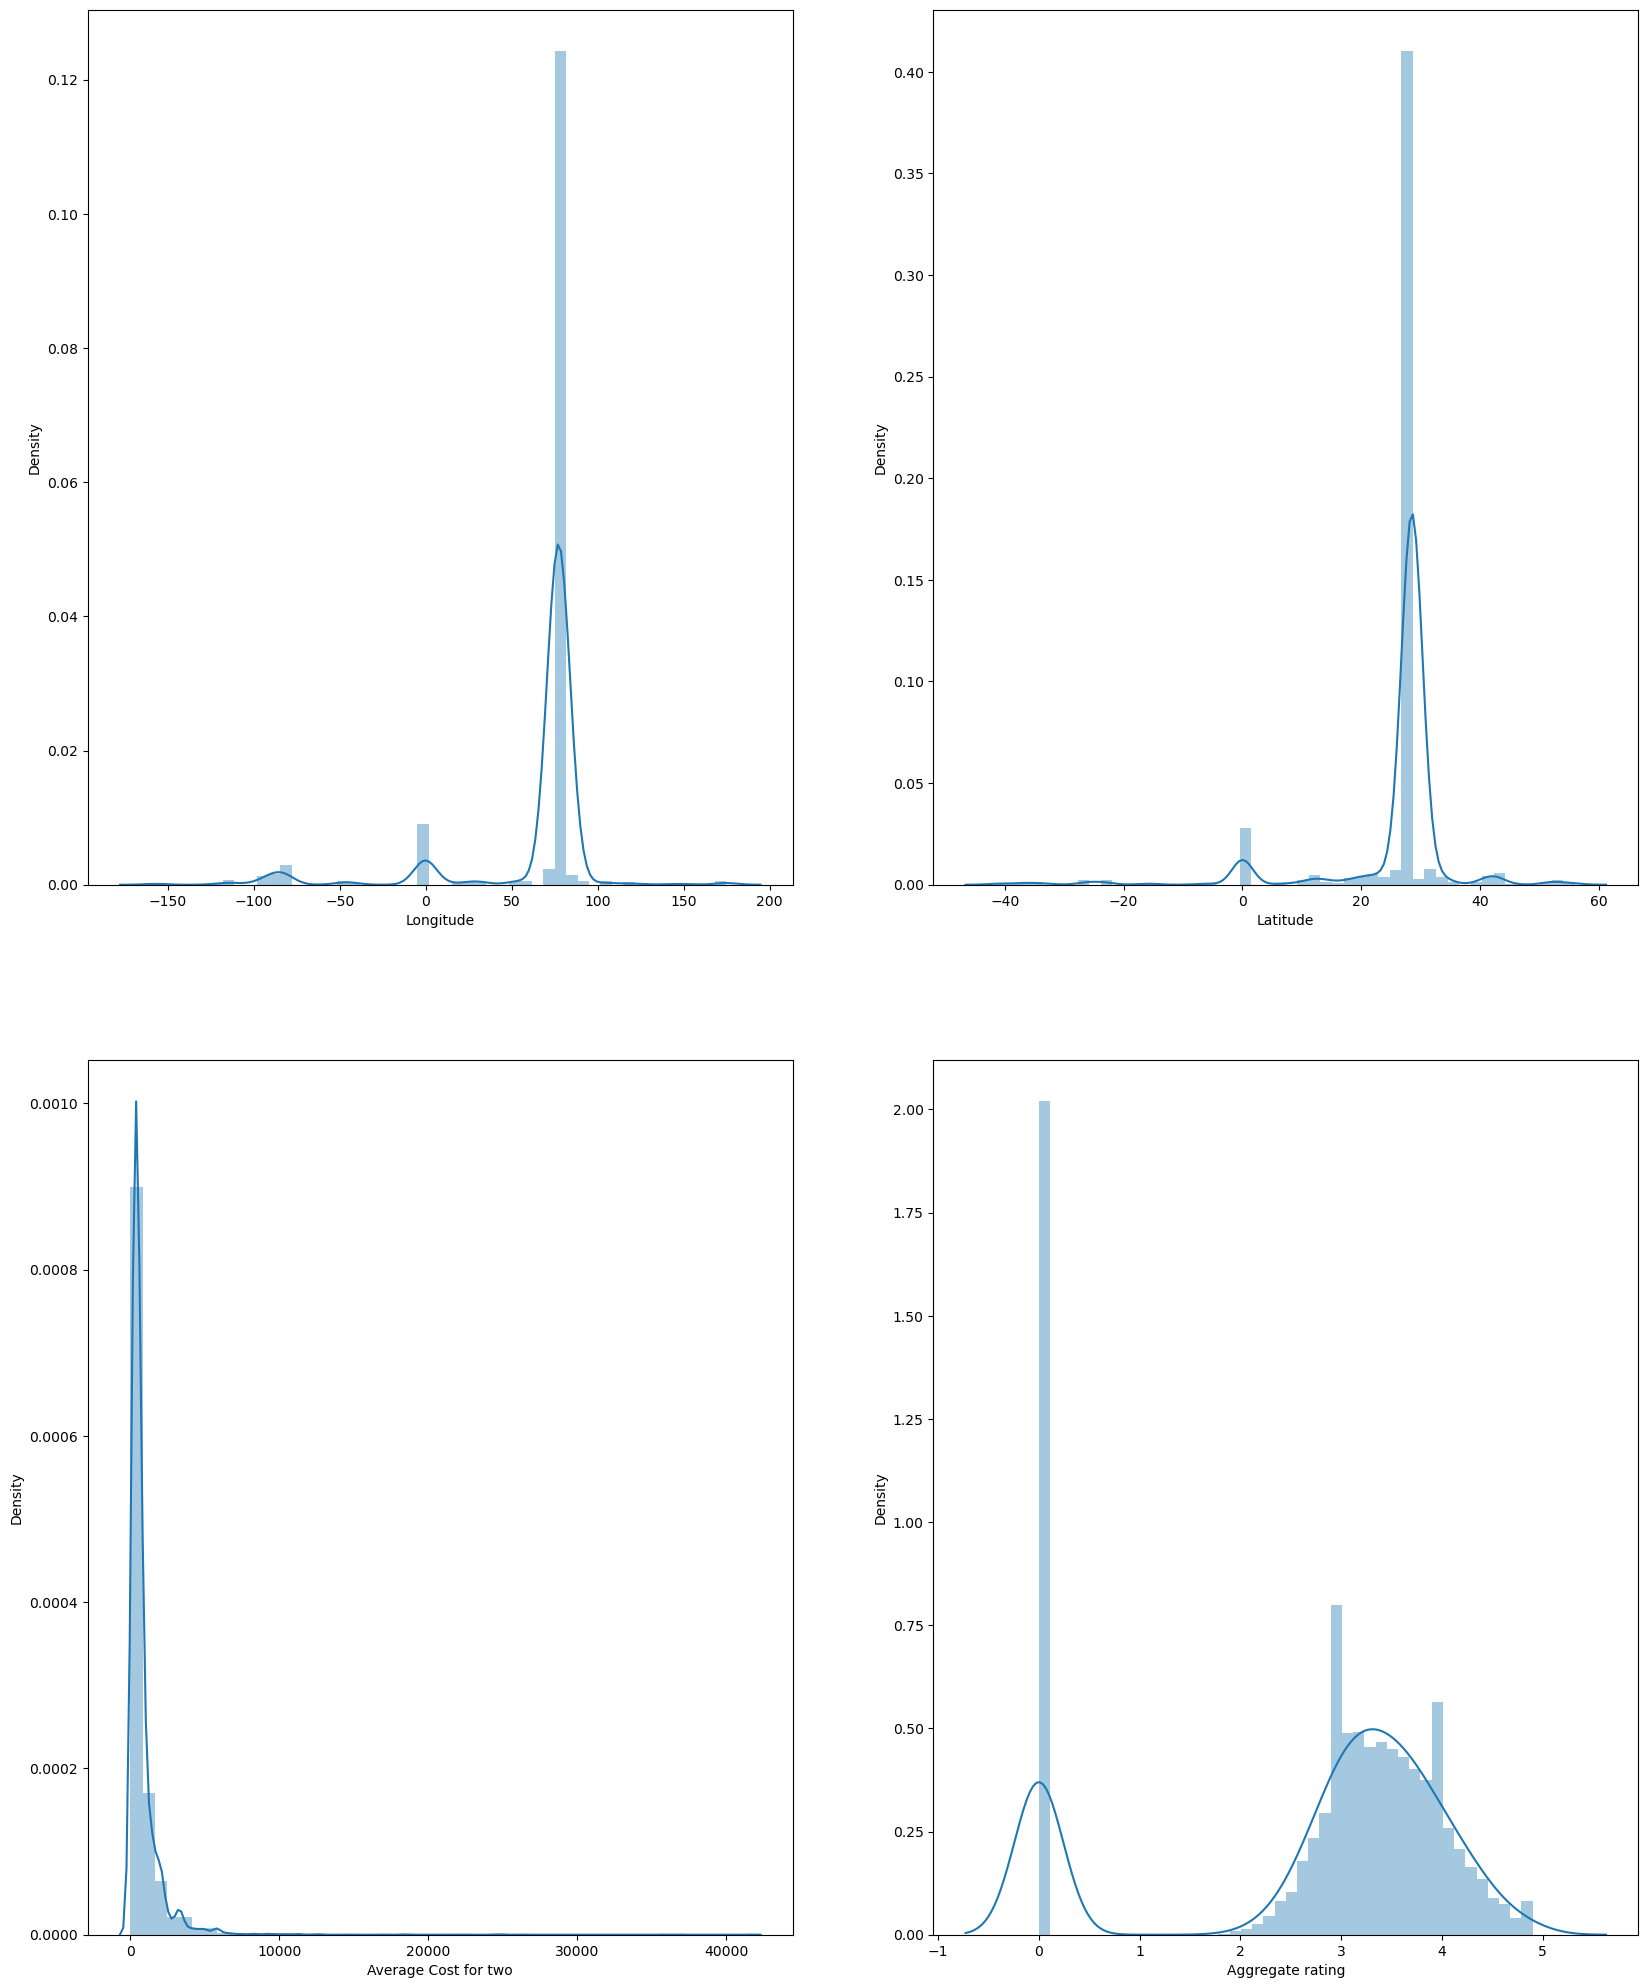

In [23]:
# Checking data distribution of numerical columns
plt.figure(figsize =(20, 25))
plotnumber =1

for i in num_cols:
    if plotnumber <= 4:
        plt.subplot(2, 2, plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

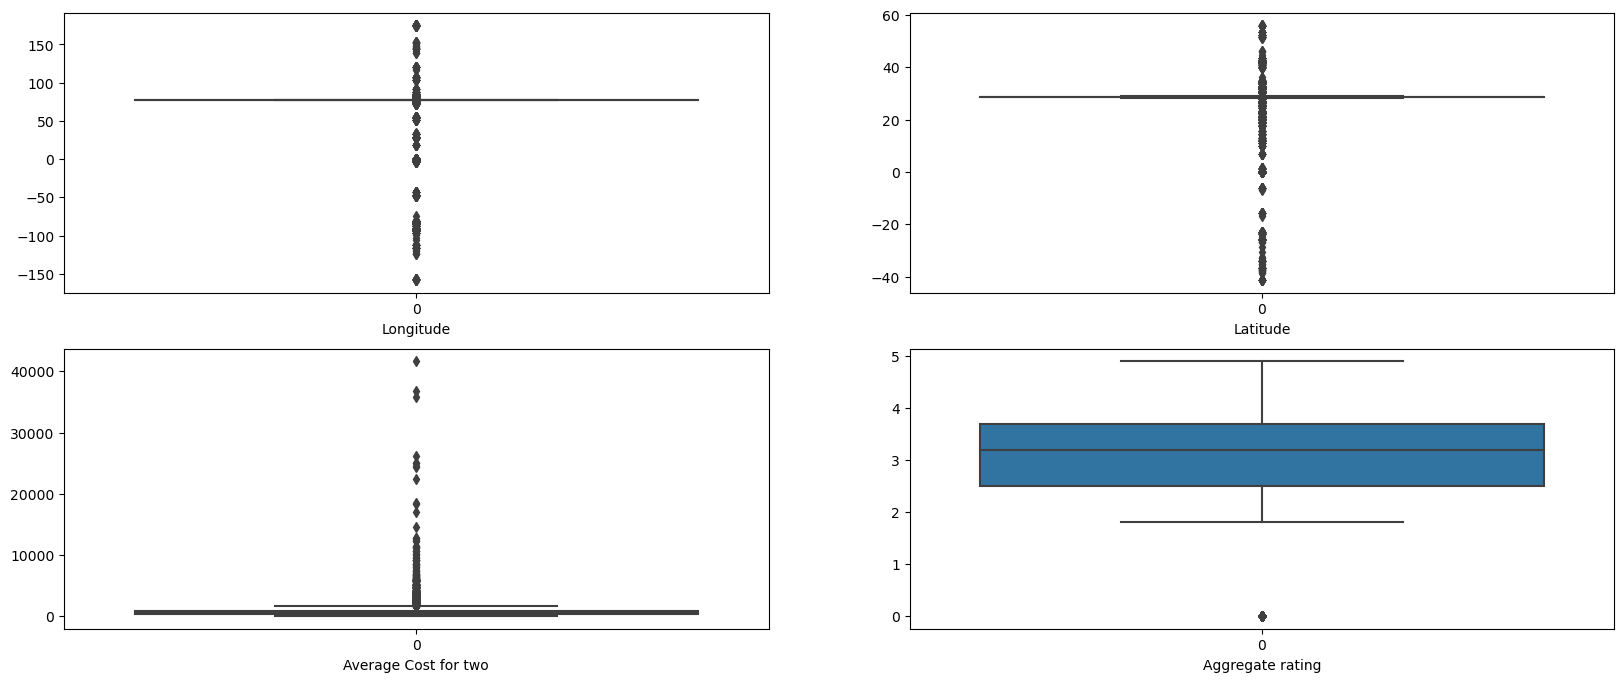

In [24]:
# Checking outliers
plt.figure(figsize =(20, 8))
plotnumber =1

for i in num_cols:
    if plotnumber <= 4:
        plt.subplot(2, 2, plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

In [25]:
# Removing outlier using zscore
df_zscore =df[['Longitude', 'Latitude', 'Aggregate rating']]
z =np.abs(zscore(df_zscore))
df =df[(z < 3).all(axis =1)]
df.shape

(8930, 21)

In [26]:
# Checking skewness in the dataset
df[num_cols].skew()

Longitude               -3.176909
Latitude                -2.243862
Average Cost for two    13.498042
Aggregate rating        -0.899294
dtype: float64

In [27]:
# Removing skewness from the dataset
df['Longitude'], _ =stats.yeojohnson(df['Longitude'])
df['Latitude'], _ =stats.yeojohnson(df['Latitude'])
df['Average Cost for two'],_ =stats.yeojohnson(df['Average Cost for two'])
df['Aggregate rating'],_ =stats.yeojohnson(df['Aggregate rating'])

In [28]:
df[num_cols].skew()

Longitude              -0.936474
Latitude                0.320521
Average Cost for two   -0.032407
Aggregate rating       -0.613646
dtype: float64

In [29]:
# Encoding categorical columns into numerical 
OE =OrdinalEncoder()

for i in df:
    if df[i].dtypes =='object':
        df[i] =OE.fit_transform(df[i].values.reshape(-1, 1))
        
df

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
1969,880.0,1,25.0,2426.0,767.0,812.0,0.000000,0.000000,412.0,4.513020,...,0.0,0.0,0.0,0.0,1,5.918526,2.0,0.0,6,0.0
5105,456.0,1,46.0,890.0,510.0,520.0,7403.996841,197.268514,1521.0,5.556639,...,0.0,0.0,0.0,0.0,1,0.000000,4.0,3.0,0,0.0
3857,5348.0,1,46.0,5958.0,275.0,281.0,7399.092805,197.248182,1049.0,4.958982,...,0.0,0.0,0.0,0.0,1,0.000000,4.0,3.0,0,0.0
2947,3551.0,1,46.0,1904.0,157.0,158.0,7409.315268,195.387345,141.0,5.747062,...,0.0,1.0,0.0,0.0,2,7.328960,5.0,2.0,458,0.0
5826,1017.0,1,46.0,122.0,563.0,574.0,7408.788040,195.540908,195.0,5.657275,...,0.0,1.0,0.0,0.0,1,5.650278,2.0,0.0,38,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2240,6498.0,1,25.0,4324.0,921.0,976.0,7371.019553,195.084183,1049.0,6.032305,...,0.0,1.0,0.0,0.0,2,6.191430,2.0,0.0,11,0.0
5238,1182.0,1,46.0,2683.0,530.0,541.0,7417.867881,196.204305,1116.0,6.411838,...,1.0,1.0,0.0,0.0,3,6.191430,2.0,0.0,51,0.0
794,5727.0,1,14.0,6775.0,735.0,760.0,7315.381663,221.009867,52.0,6.820584,...,0.0,0.0,0.0,0.0,3,9.491894,1.0,5.0,228,0.0
8147,3246.0,1,47.0,426.0,384.0,390.0,7426.617240,195.850795,1261.0,5.747062,...,0.0,1.0,0.0,0.0,2,5.127886,2.0,0.0,109,0.0


In [30]:
# Resetting index
df.reset_index(drop =True, inplace =True)

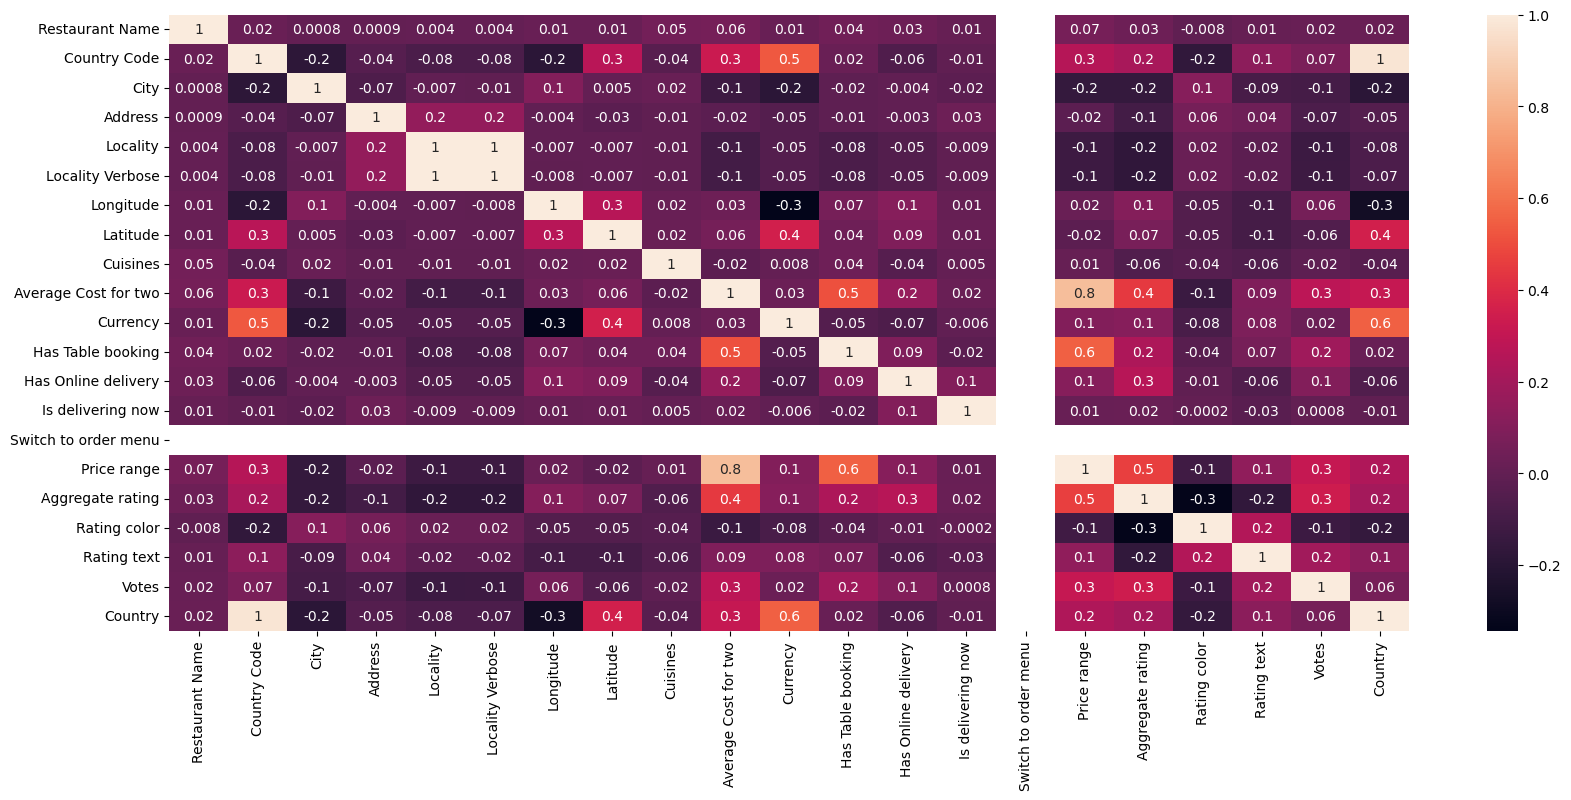

In [31]:
# Plotting heatmap
plt.figure(figsize =(20, 8))
sns.heatmap(df.corr(), annot =True, fmt ='.1g')
plt.show()

__We found multicollinearity between:__
    1. Country Code and Country
    2. Locality and Locality Verbose
    3. Average cost for two and price range

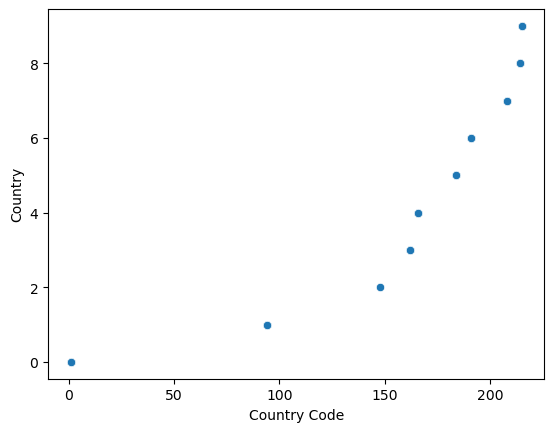

In [32]:
# Plotting scatterplot to confirm multicollinearity
sns.scatterplot(x ='Country Code', y='Country', data =df)
plt.show()

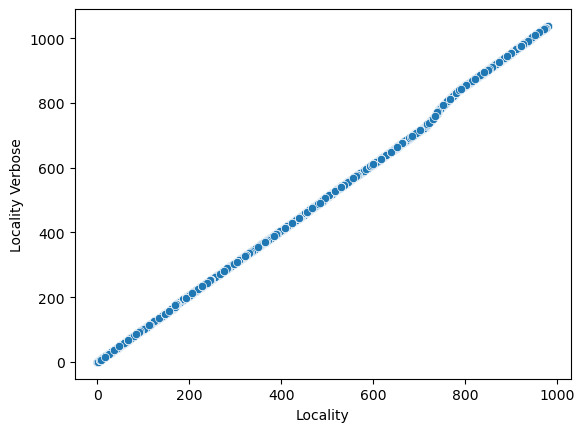

In [33]:
# Plotting scatterplot to confirm multicollinearity
sns.scatterplot(x ='Locality', y='Locality Verbose', data =df)
plt.show()

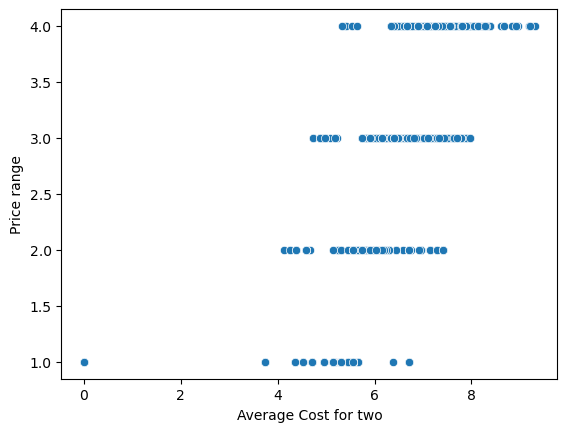

In [34]:
# Plotting scatterplot to confirm multicollinearity
sns.scatterplot(x ='Average Cost for two', y='Price range', data =df)
plt.show()

In [35]:
# We will delete 'Country Code' and 'Locality Verbose'
df.drop(columns =['Country Code', 'Locality Verbose'], inplace =True)

In [36]:
# Seperating Features and label
x =df.drop(columns =['Average Cost for two'])
y =df[['Average Cost for two']]

In [37]:
# Data Standardization
scaler =StandardScaler()
x =pd.DataFrame(scaler.fit_transform(x), columns =x.columns)
x

,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,-1.254277,-1.486626,-0.752153,0.913094,-3.274302,-2.847832,-0.889457,-0.091403,-0.385617,-0.615060,-0.061822,0.0,-0.866751,0.242443,-0.699035,-1.030806,-0.320493,-0.167172
1,-1.470138,0.451588,-1.397060,-0.111825,0.214978,0.238709,1.631863,-0.091403,-0.385617,-0.615060,-0.061822,0.0,-0.866751,-1.620295,0.692955,0.783722,-0.334495,-0.167172
2,1.020406,0.451588,0.730799,-1.049007,0.212667,0.238391,0.558767,-0.091403,-0.385617,-0.615060,-0.061822,0.0,-0.866751,-1.620295,0.692955,0.783722,-0.334495,-0.167172
3,0.105544,0.451588,-0.971320,-1.519592,0.217484,0.209276,-1.505577,-0.091403,-0.385617,1.625857,-0.061822,0.0,0.268658,0.686348,1.388951,0.178879,0.734361,-0.167172
4,-1.184530,0.451588,-1.719514,0.099540,0.217236,0.211678,-1.382808,-0.091403,-0.385617,1.625857,-0.061822,0.0,-0.866751,0.158017,-0.699035,-1.030806,-0.245813,-0.167172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8925,1.605878,-1.486626,0.044745,1.527247,0.199437,0.204532,0.558767,-0.091403,-0.385617,1.625857,-0.061822,0.0,0.268658,0.328334,-0.699035,-1.030806,-0.308824,-0.167172
8926,-1.100527,0.451588,-0.644248,-0.032064,0.221515,0.222058,0.711092,-0.091403,2.593244,1.625857,-0.061822,0.0,1.404067,0.328334,-0.699035,-1.030806,-0.215474,-0.167172
8927,1.213357,-2.501880,1.073826,0.785478,0.173216,0.610176,-1.707919,-0.091403,-0.385617,-0.615060,-0.061822,0.0,1.404067,1.367088,-1.395030,1.993407,0.197599,-0.167172
8928,-0.049734,0.543884,-1.591876,-0.614314,0.225638,0.216527,1.040751,-0.091403,-0.385617,1.625857,-0.061822,0.0,0.268658,-0.006395,-0.699035,-1.030806,-0.080117,-0.167172


In [38]:
# Checking vif score
vif =pd.DataFrame()
vif['VIF Score'] =[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] =x.columns
vif

,VIF Score,Features
0,1.008702,Restaurant Name
1,1.104148,City
2,1.044965,Address
3,1.064428,Locality
4,1.574622,Longitude
5,1.703657,Latitude
6,1.024126,Cuisines
7,1.782853,Currency
8,1.518066,Has Table booking
9,1.131115,Has Online delivery


__All the vif scores are under 10, so we will not delete any columns.__

# EDA Completed

## Model Building

### Finding best random state

In [39]:
maxrs =0
maxacc =0

for i in range(1, 200):
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =i)
    LR =LinearRegression()
    LR.fit(x_train, y_train)
    pred =LR.predict(x_test)
    acc =r2_score(y_test, pred)
    
    if acc > maxacc:
        maxacc =acc
        maxrs =i
        
print("Maximum accuracy is :", acc*100, "at random state :", maxrs)

Maximum accuracy is : 74.92734628075164 at random state : 115


In [40]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =maxrs)

In [41]:
# Initializing models
RFR =RandomForestRegressor()
ETR =ExtraTreesRegressor()
LR =LinearRegression()
svr =SVR()
GBR =GradientBoostingRegressor()
ABR =AdaBoostRegressor()
BR =BaggingRegressor()
DTR =DecisionTreeRegressor()
lasso =Lasso()
ridge =Ridge()

In [42]:
# Initializing Models

models ={'RandomForestRegressor' :RFR,
        'ExtraTressRegressor' : ETR,
        'LinearRegression' :LR,
        'SVR' :svr,
        'GradientBoostingRegressor' :GBR,
        'AdaBoostRegressor' :ABR,
        'BaggingRegressor' :BR,
        'DecisionTreeRegressor' :DTR,
        'Lasso': lasso,
        'Ridge' :ridge}

for name, model in models.items():
    model.fit(x_train, y_train)
    pred_test =model.predict(x_test)
    pred_train =model.predict(x_train)
    acc =r2_score(y_test, pred_test)
    
    print("Model Name :", name)
    print("*"*35)
    print("Accuracy on Training data :", (r2_score(y_train, pred_train))*100)
    print("Accuracy on Test data :", (r2_score(y_test, pred_test))*100)
    print("Mean Squared Error :", mean_squared_error(y_test, pred_test))
    print("Mean Absolute Error :", mean_absolute_error(y_test, pred_test))
    print("Root Mean Squared Error :", np.sqrt(mean_squared_error(y_test, pred_test)))
    
    print('\n')
    print("Cross Validation for the model :", name)
    print("*"*30)
    score =cross_val_score(model, x, y, cv=5)
    print(score)
    print(score.mean())
    print("Difference between accuracy of the model and cross validation is :", (acc -(score.mean()))*100)
    print("="*80)
    print('\n')


Model Name : RandomForestRegressor
***********************************
Accuracy on Training data : 97.55774488312034
Accuracy on Test data : 85.7338775938426
Mean Squared Error : 0.06592021339385512
Mean Absolute Error : 0.17997497585843045
Root Mean Squared Error : 0.2567493201429268


Cross Validation for the model : RandomForestRegressor
******************************
[0.84607492 0.81856277 0.84784056 0.84418663 0.82224464]
0.835781904653351
Difference between accuracy of the model and cross validation is : 2.1556871285075108


Model Name : ExtraTressRegressor
***********************************
Accuracy on Training data : 100.0
Accuracy on Test data : 84.39830339353234
Mean Squared Error : 0.07209157052799695
Mean Absolute Error : 0.18785631652259852
Root Mean Squared Error : 0.2684987346860259


Cross Validation for the model : ExtraTressRegressor
******************************
[0.8348775  0.81926872 0.84188088 0.85123444 0.8184188 ]
0.8331360684192042
Difference between accuracy 

__RandomForestRegressor is our best model with the accuracy of 85.41%.__

# Hyperparameter Tunning

In [43]:
parameters ={'n_estimators': [25, 50, 100, 150], 
            'max_features': ['sqrt', 'log2', None], 
            'max_depth': [3, 6, 9], 
            'max_leaf_nodes': [3, 6, 9]
            }

In [44]:
GCV =GridSearchCV(RandomForestRegressor(), parameters, cv =5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [45]:
GCV.best_params_

{'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 9,
 'n_estimators': 100}

In [46]:
Final_model =RandomForestRegressor(max_depth =6, max_features =None, max_leaf_nodes =9, n_estimators =100)
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc =r2_score(y_test, pred)
print(acc*100)

77.78773016235132


__Model accuracy does not increase after hyperparameter tunning. We will go with default parameters.__

In [47]:
Final_model =RandomForestRegressor()
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc =r2_score(y_test, pred)
print(acc*100)

85.82592340756372


In [48]:
# Saving Model
pickle.dump(Final_model, open('average_cost.pkl', 'wb'))

In [49]:
# Loading the model
loaded_model =pickle.load(open('average_cost.pkl', 'rb'))
loaded_model.fit(x_train, y_train)
pred =loaded_model.predict(x_test)
acc =r2_score(y_test, pred)
print("Accuracy is :", acc*100)

Accuracy is : 85.3857929013031


In [50]:
# Comparing Actual Vs predicted
act =np.array(y_test)
df1 =pd.DataFrame()
df1['Predicted'] =pred
df1['Actual'] =act
df1

,Predicted,Actual
0,5.273930,5.309696
1,5.916488,5.747062
2,5.754647,5.747062
3,5.168412,5.556639
4,6.051124,6.144867
...,...,...
2674,5.898009,5.969677
2675,6.563063,6.773400
2676,5.320215,5.309696
2677,5.939668,5.969677


# Predicting Price Range (Classification Problem)

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif
import pickle

import warnings
warnings.filterwarnings('ignore')

In [171]:
country_code =pd.read_excel(r'D:\Backup\Old PC\Chandan\Data Science\Internship\Final Project\Phase-3\Country-Code.xlsx', 
                            sheet_name ='Sheet1' )
zomato =pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Z_Restaurant/zomato.csv', encoding="ISO-8859-1")

In [172]:
country_code

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [173]:
zomato

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


__We found some junk characters in the data set. We will remove it.__

In [174]:
# Removint junk characters
zomato = zomato.replace(r'[^0-9a-zA-Z ]', '', regex=True).replace("'", '')

In [175]:
zomato

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,Third Floor Century City Mall Kalayaan Avenue ...,Century City Mall Poblacion Makati City,Century City Mall Poblacion Makati City Makati...,121.027535,14.565443,French Japanese Desserts,...,Botswana PulaP,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,Little Tokyo 2277 Chino Roces Avenue Legaspi V...,Little Tokyo Legaspi Village Makati City,Little Tokyo Legaspi Village Makati City Makat...,121.014101,14.553708,Japanese,...,Botswana PulaP,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat Edsa ShangriLa,162,Mandaluyong City,Edsa ShangriLa 1 Garden Way Ortigas Mandaluyon...,Edsa ShangriLa Ortigas Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City Mandal...,121.056831,14.581404,Seafood Asian Filipino Indian,...,Botswana PulaP,Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,Third Floor Mega Fashion Hall SM Megamall Orti...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.056475,14.585318,Japanese Sushi,...,Botswana PulaP,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,Third Floor Mega Atrium SM Megamall Ortigas Ma...,SM Megamall Ortigas Mandaluyong City,SM Megamall Ortigas Mandaluyong City Mandaluyo...,121.057508,14.584450,Japanese Korean,...,Botswana PulaP,Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,stanbul,Kemanke Karamustafa Paa Mahallesi Rhtm Caddesi...,Karaky,Karaky stanbul,28.977392,41.022793,Turkish,...,Turkish LiraTL,No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac,208,stanbul,Kouyolu Mahallesi Muhittin stnda Caddesi No 85...,Kouyolu,Kouyolu stanbul,29.041297,41.009847,World Cuisine Patisserie Cafe,...,Turkish LiraTL,No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,Kurueme Mahallesi Muallim Naci Caddesi No 56 B...,Kurueme,Kurueme stanbul,29.034640,41.055817,Italian World Cuisine,...,Turkish LiraTL,No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,stanbul,Kurueme Mahallesi Muallim Naci Caddesi No 64B ...,Kurueme,Kurueme stanbul,29.036019,41.057979,Restaurant Cafe,...,Turkish LiraTL,No,No,No,No,4,4.0,Green,Very Good,901


In [176]:
country_code.dtypes

Country Code     int64
Country         object
dtype: object

In [177]:
zomato.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [178]:
# Concatenating 2 dataset
df =zomato.merge(country_code)
df =df.sample(frac =1)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
5865,18384151,No Name Taste Hi Kaafi Hai,1,New Delhi,Unit G73 Aggarwal Cyber Plaza 2 Netaji Subhash...,Netaji Subhash Place,Netaji Subhash Place New Delhi,77.149999,28.694083,Burger Fast Food,...,No,Yes,No,No,1,3.2,Orange,Average,31,India
5895,9561,Barbeque Nation,1,New Delhi,101 102 1st Floor Agarwal Corporate Heights N...,Netaji Subhash Place,Netaji Subhash Place New Delhi,77.151617,28.692358,North Indian Chinese,...,No,No,No,No,3,4.1,Green,Very Good,937,India
9300,7003855,Orleans,148,Auckland,Roukai Lane 48 Custom Street East Britomart Au...,Britomart,Britomart Auckland,174.769552,-36.845331,American,...,No,No,No,No,3,4.1,Green,Very Good,431,New Zealand
3436,3719,TGI Fridays,1,New Delhi,314316 2nd Floor DLF Place Mall Saket New Delhi,DLF Place Mall Saket,DLF Place Mall Saket New Delhi,77.216122,28.528579,American TexMex,...,Yes,Yes,No,No,4,3.7,Yellow,Good,984,India
2136,18433295,Kujays Spoon,1,Gurgaon,C2462 Phase 1 Sushant Lok Gurgaon,Sushant Lok,Sushant Lok Gurgaon,77.079695,28.449967,North Indian Mughlai Chinese,...,No,No,No,No,2,0.0,White,Not rated,1,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999,7515,Kunafa,1,New Delhi,70 Mehar Chand Market Lodhi Colony New Delhi,Lodhi Colony,Lodhi Colony New Delhi,77.226561,28.584566,Desserts Middle Eastern Turkish,...,No,Yes,No,No,1,3.9,Yellow,Good,200,India
6328,18359300,Frontier,1,New Delhi,C284 Prashant Vihar New Delhi,Prashant Vihar,Prashant Vihar New Delhi,77.134090,28.714311,Bakery,...,No,No,No,No,1,0.0,White,Not rated,0,India
1492,18161583,Wangchuks Ladakhi Kitchen,1,Gurgaon,2nd Floor Jalsa Building Opposite Arjun Marg G...,Golf Course Road,Golf Course Road Gurgaon,77.094083,28.466322,Tibetan Nepalese,...,No,Yes,No,No,2,3.6,Yellow,Good,241,India
5519,18382113,Pindiwala,1,New Delhi,Shop 72 DLF Industrial Area Moti Nagar New Delhi,Moti Nagar,Moti Nagar New Delhi,0.000000,0.000000,Mughlai,...,No,No,No,No,2,3.0,Orange,Average,4,India


In [179]:
df.shape

(9551, 22)

__We have 9551 records and 22 columns. Out of 22 columns datatypes for the columns are object, int and float.__

In [180]:
# Checking null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [181]:
# Checking count of each column.
for i in df:
    print(df[i].value_counts())

Restaurant ID
18384151    1
18246991    1
18292458    1
313304      1
18423135    1
           ..
3961        1
312187      1
7601106     1
306476      1
18489832    1
Name: count, Length: 9551, dtype: int64
Restaurant Name
Cafe Coffee Day     83
Dominos Pizza       79
Subway              63
Green Chick Chop    51
McDonalds           48
                    ..
Royal Cakes          1
Uptown Cafe          1
Lanche               1
Mairus               1
Lotus Kitchen        1
Name: count, Length: 7430, dtype: int64
Country Code
1      8652
216     434
215      80
189      60
214      60
30       60
148      40
208      34
14       24
162      22
94       21
166      20
191      20
184      20
37        4
Name: count, dtype: int64
City
New Delhi        5473
Gurgaon          1118
Noida            1080
Faridabad         251
Ghaziabad          25
                 ... 
Mc Millan           1
Bandung             1
Victor Harbor       1
Panchkula           1
Penola              1
Name: count, Leng

In [182]:
# Filling null value
df['Cuisines'] =df['Cuisines'].fillna(df['Cuisines'].mode()[0])

In [183]:
# Again checking null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [184]:
# Checking unique records
df.nunique()

Restaurant ID           9551
Restaurant Name         7430
Country Code              15
City                     141
Address                 8899
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [185]:
# Deleting Restuarant ID, as it is just a record number
df.drop(columns =['Restaurant ID'], inplace =True)

In [186]:
# Checking Statistical health of the dataset
df.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


__Since We have currency for different countries in 'Average Cost for two', we will convert it to India Rupees.__

__WE are using below conversion rate.__
 
     1.Dollar	                 83.24
     2.Pounds	                 106
     3.Brazilian RealR	         16.14
     4.Emirati DiramAED	         22.66
     5.RandR	                 4.5518
     6.NewZealand	             51.02
     7.Turkish LiraTL	         2.58
     8.Botswana PulaP	         6.14
     9.Indonesian RupiahIDR	     0.0052
     10.Qatari RialQR	         22.86
     11.Sri Lankan RupeeLKR	     0.28

In [187]:
df.loc[df['Currency'] =='Dollar', 'Average Cost for two'] =df['Average Cost for two'] * 83.24
df.loc[df['Currency'] =='Pounds', 'Average Cost for two'] =df['Average Cost for two'] * 106
df.loc[df['Currency'] =='Brazilian RealR', 'Average Cost for two'] =df['Average Cost for two'] * 16.14
df.loc[df['Currency'] =='Emirati DiramAED', 'Average Cost for two'] =df['Average Cost for two'] * 22.66
df.loc[df['Currency'] =='RandR', 'Average Cost for two'] =df['Average Cost for two'] * 4.5518
df.loc[df['Currency'] =='NewZealand', 'Average Cost for two'] =df['Average Cost for two'] * 51.02
df.loc[df['Currency'] =='Turkish LiraTL', 'Average Cost for two'] =df['Average Cost for two'] * 2.58
df.loc[df['Currency'] =='Botswana PulaP', 'Average Cost for two'] =df['Average Cost for two'] * 6.14
df.loc[df['Currency'] =='Indonesian RupiahIDR', 'Average Cost for two'] =df['Average Cost for two'] * 0.0052
df.loc[df['Currency'] =='Qatari RialQR', 'Average Cost for two'] =df['Average Cost for two'] * 22.86
df.loc[df['Currency'] =='Sri Lankan RupeeLKR', 'Average Cost for two'] =df['Average Cost for two'] * 0.28

In [188]:
# Seperating Numerical and categorical columns

# Seperating numerical columns
num_cols =[]
for i in df.dtypes.index:
    if df[i].dtypes =='float64':
        num_cols.append(i)
        
# Seperating categorical columns
cat_cols =[]
for i in df.dtypes.index:
    if df[i].dtypes =='object':
        cat_cols.append(i)
        
print("Numerical Columns are :", num_cols)
print("Categorical Columns are :", cat_cols)
print("No. of Numerical Columns are :", len(num_cols))
print("No. of Categorical Columns are :", len(cat_cols))

Numerical Columns are : ['Longitude', 'Latitude', 'Average Cost for two', 'Aggregate rating']
Categorical Columns are : ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']
No. of Numerical Columns are : 4
No. of Categorical Columns are : 14


# Univariate Analysis

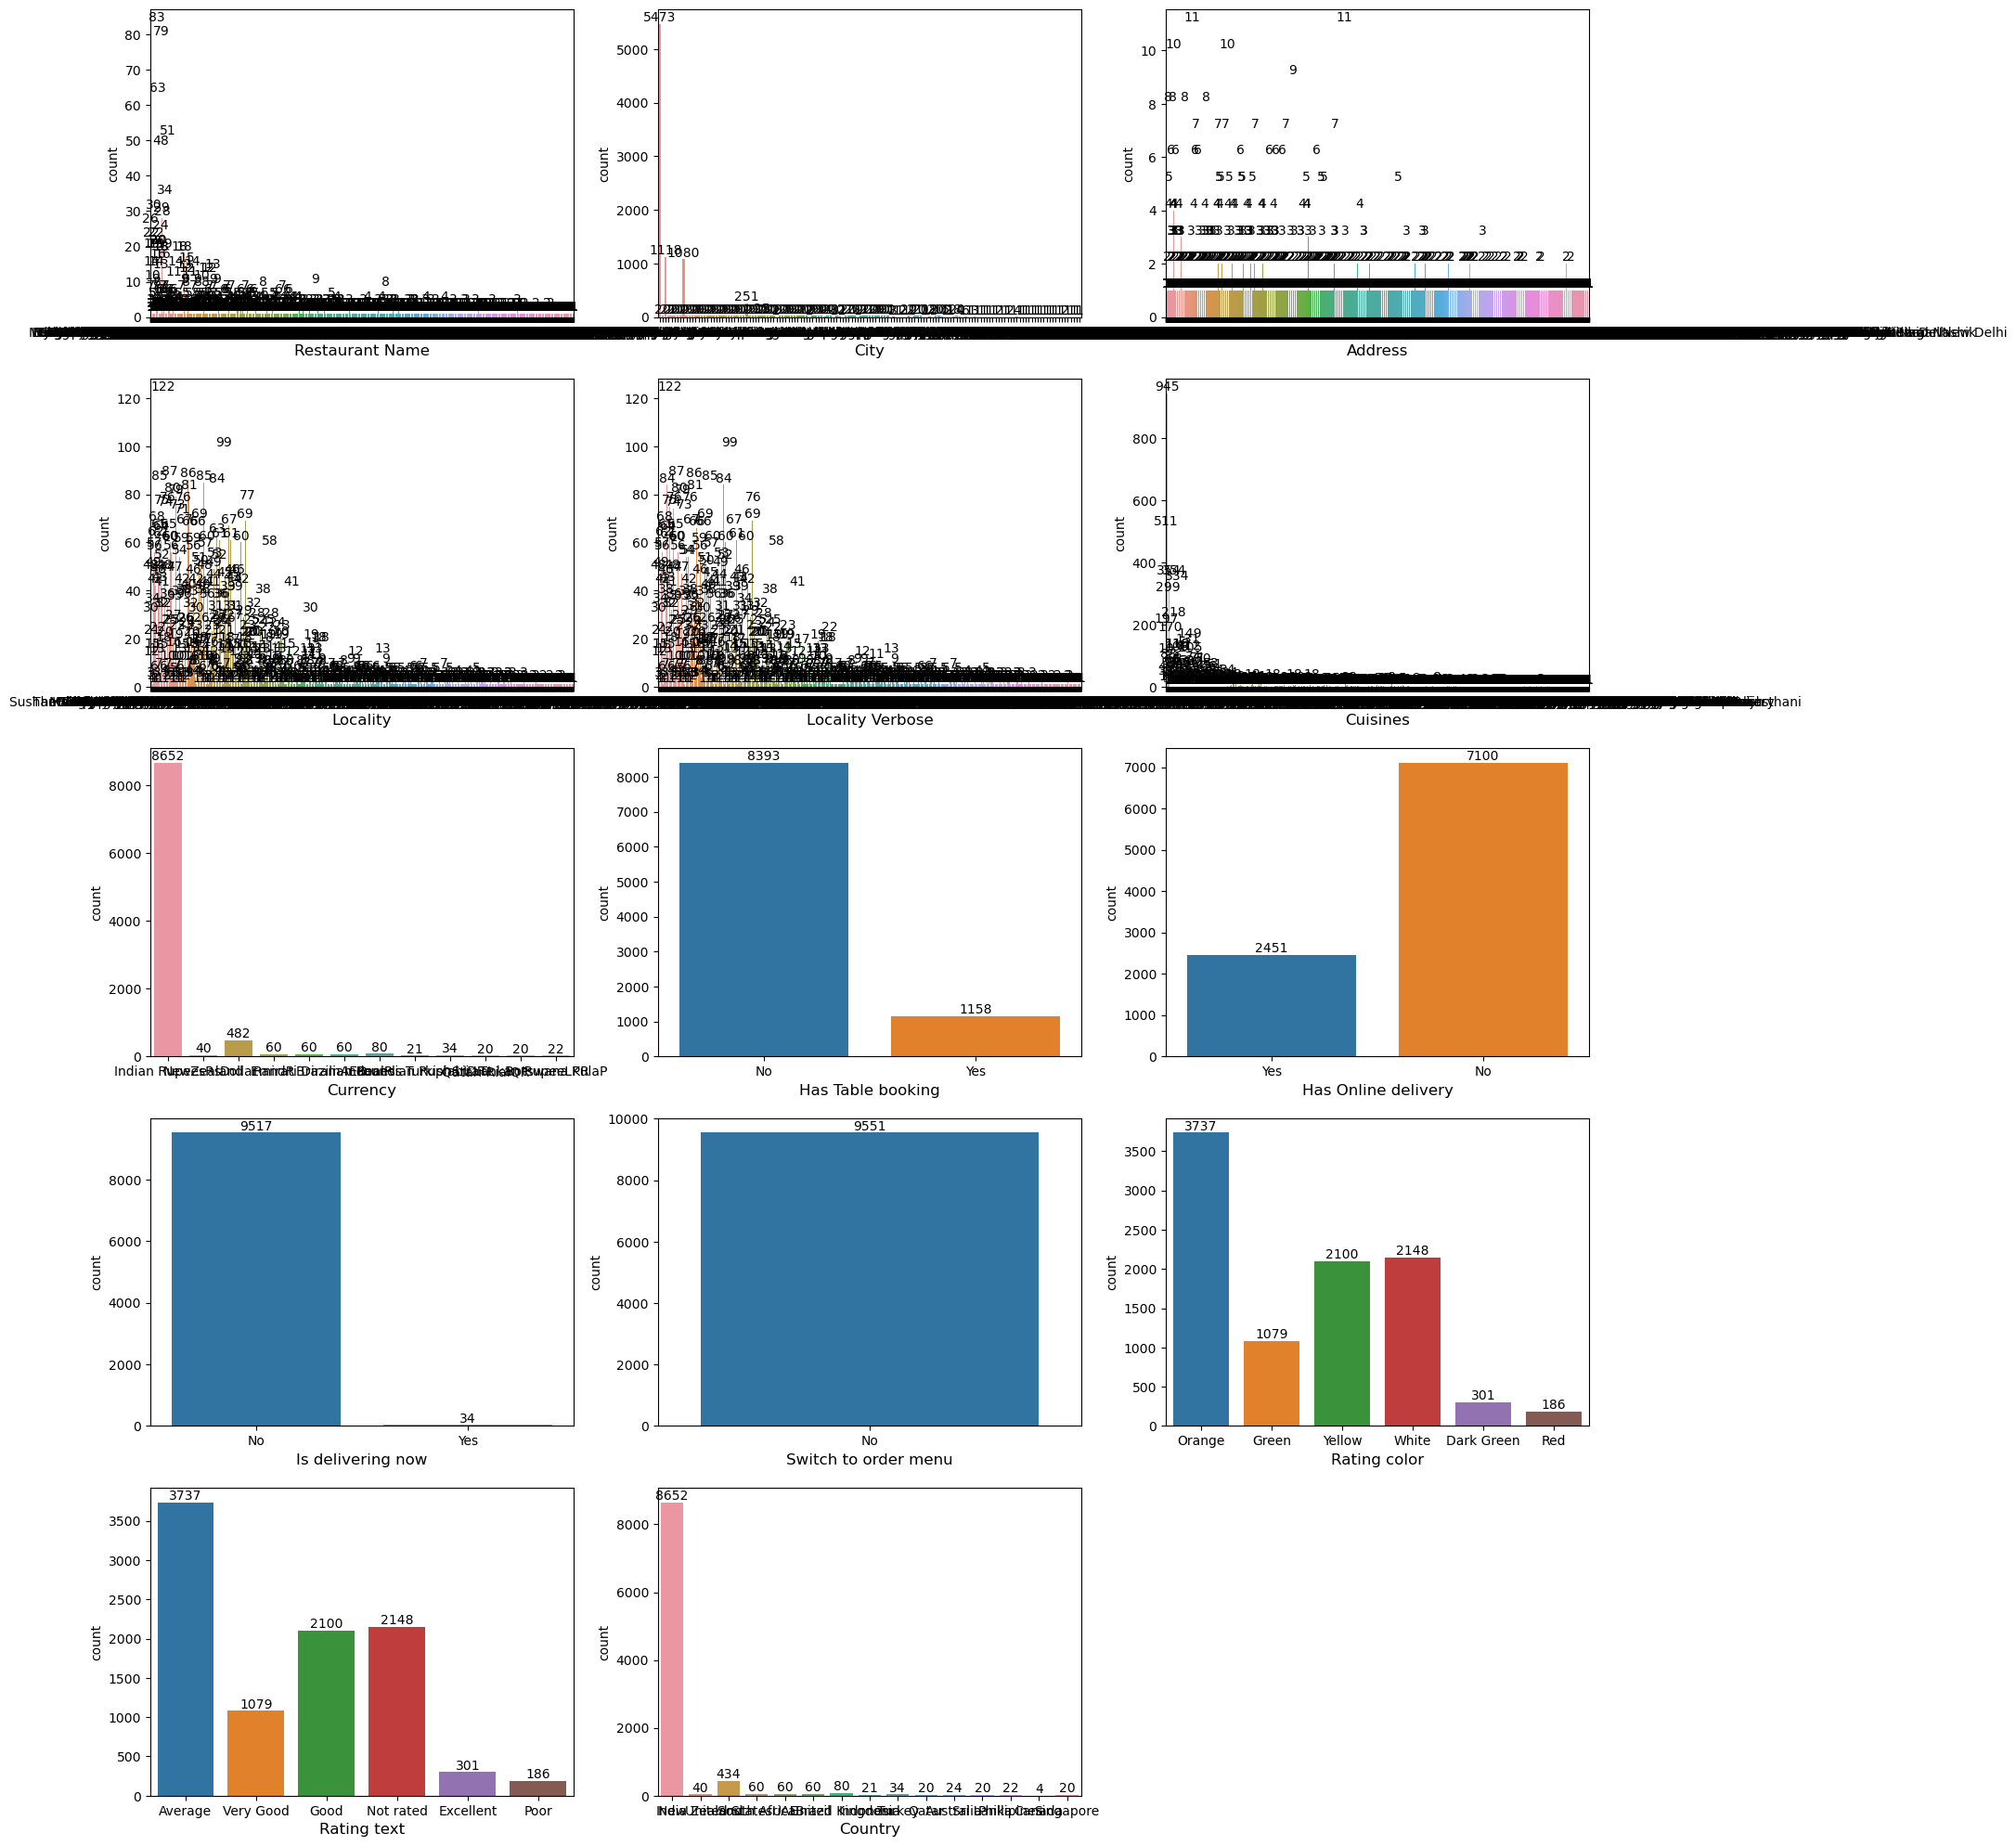

In [189]:
plt.figure(figsize =(20, 25))
plotnumber =1

for i in cat_cols:
    if plotnumber <= 14:
        plt.subplot(5, 3, plotnumber)
        ax =sns.countplot(x =i, data =df)
        ax.bar_label(ax.containers[0])
        plt.xlabel(i, fontsize =12)
    plotnumber+=1
plt.show()

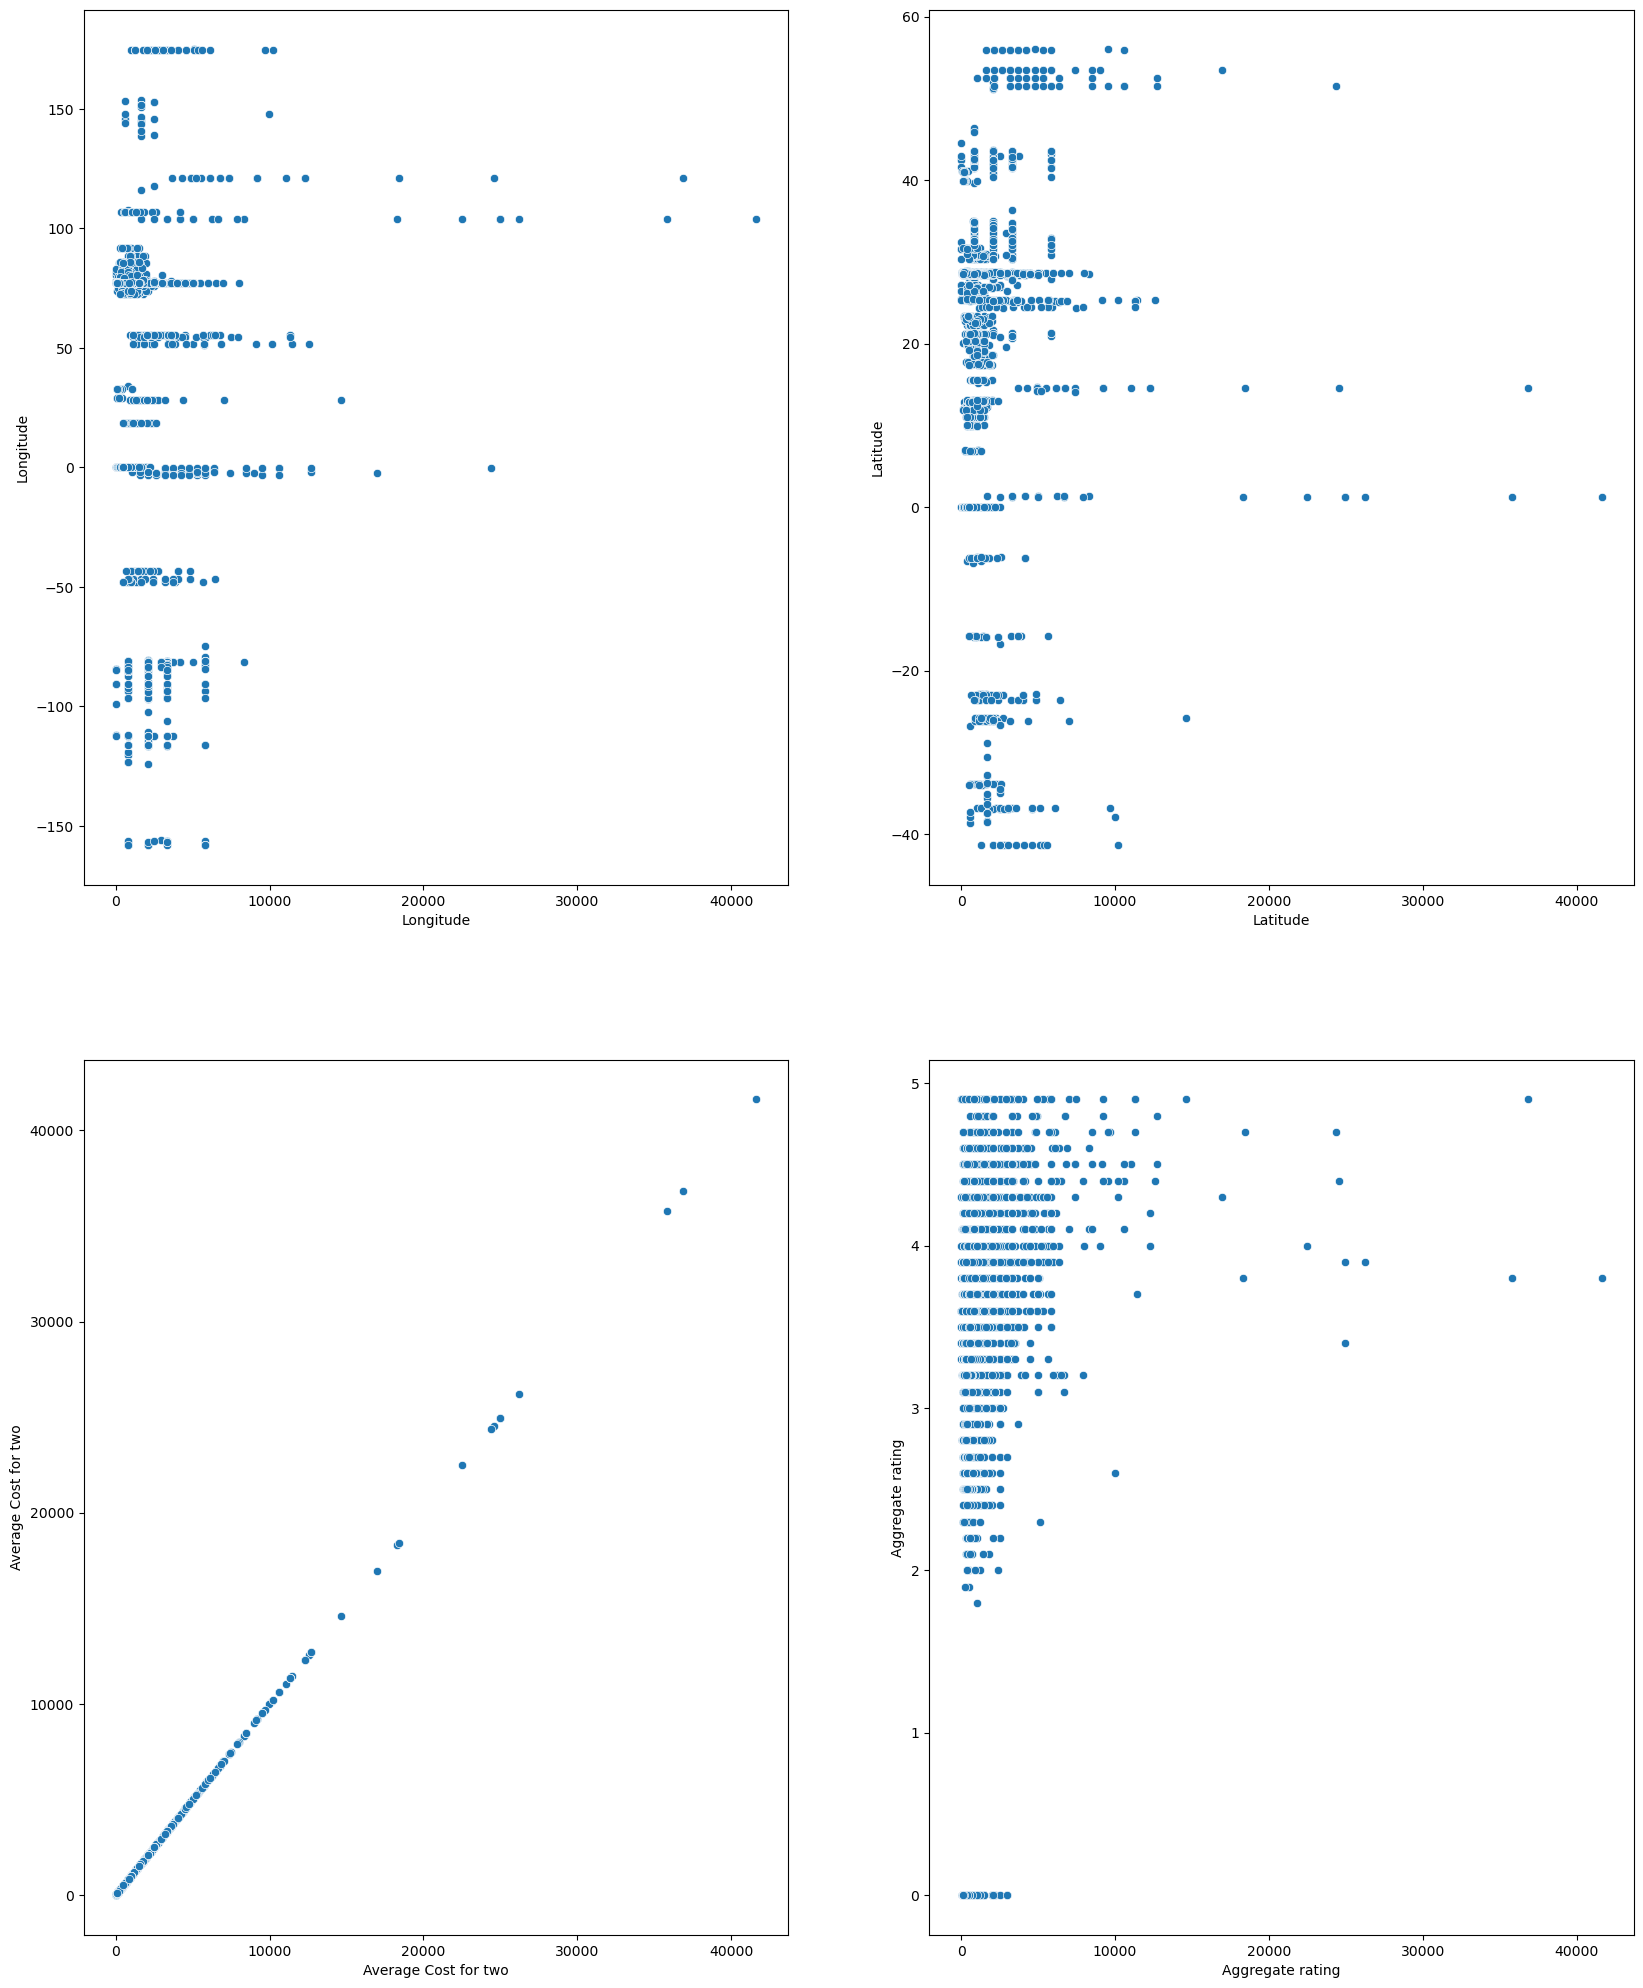

In [190]:
# Plotting scatter plot for numerical columns
plt.figure(figsize =(20, 25))
plotnumber =1

for i in num_cols:
    if plotnumber <= 4:
        plt.subplot(2, 2, plotnumber)
        sns.scatterplot(x ='Average Cost for two', y =i, data =df)
        plt.xlabel(i)
    plotnumber+=1
plt.show()

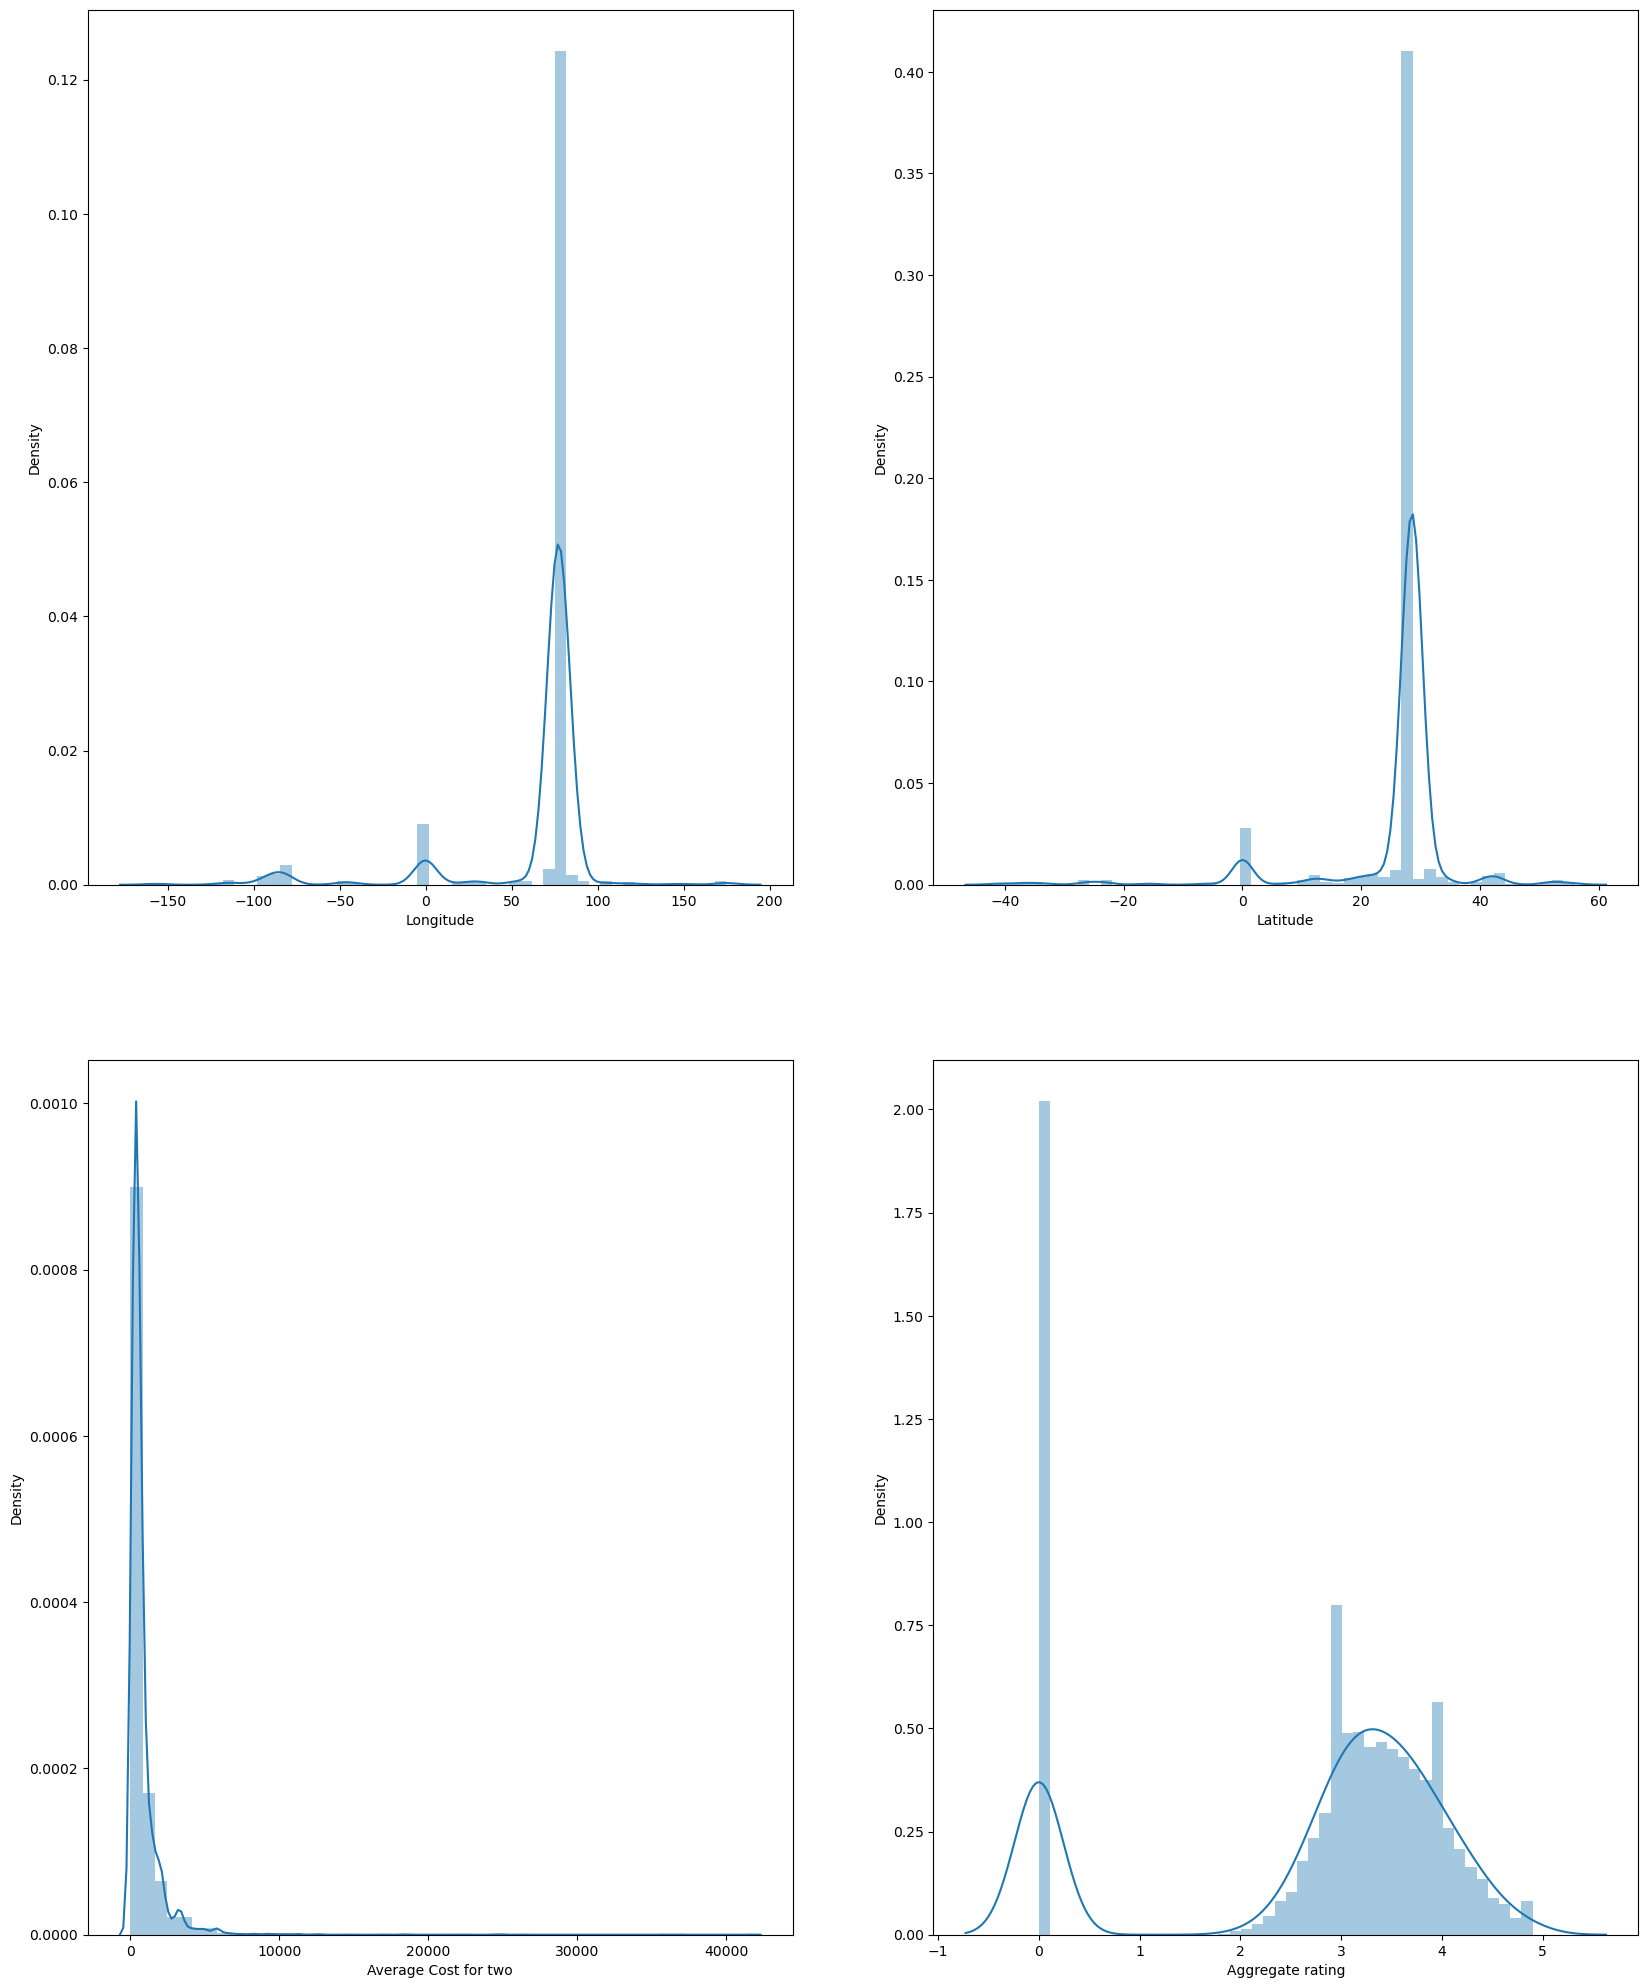

In [191]:
# Checking data distribution of numerical columns
plt.figure(figsize =(20, 25))
plotnumber =1

for i in num_cols:
    if plotnumber <= 4:
        plt.subplot(2, 2, plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

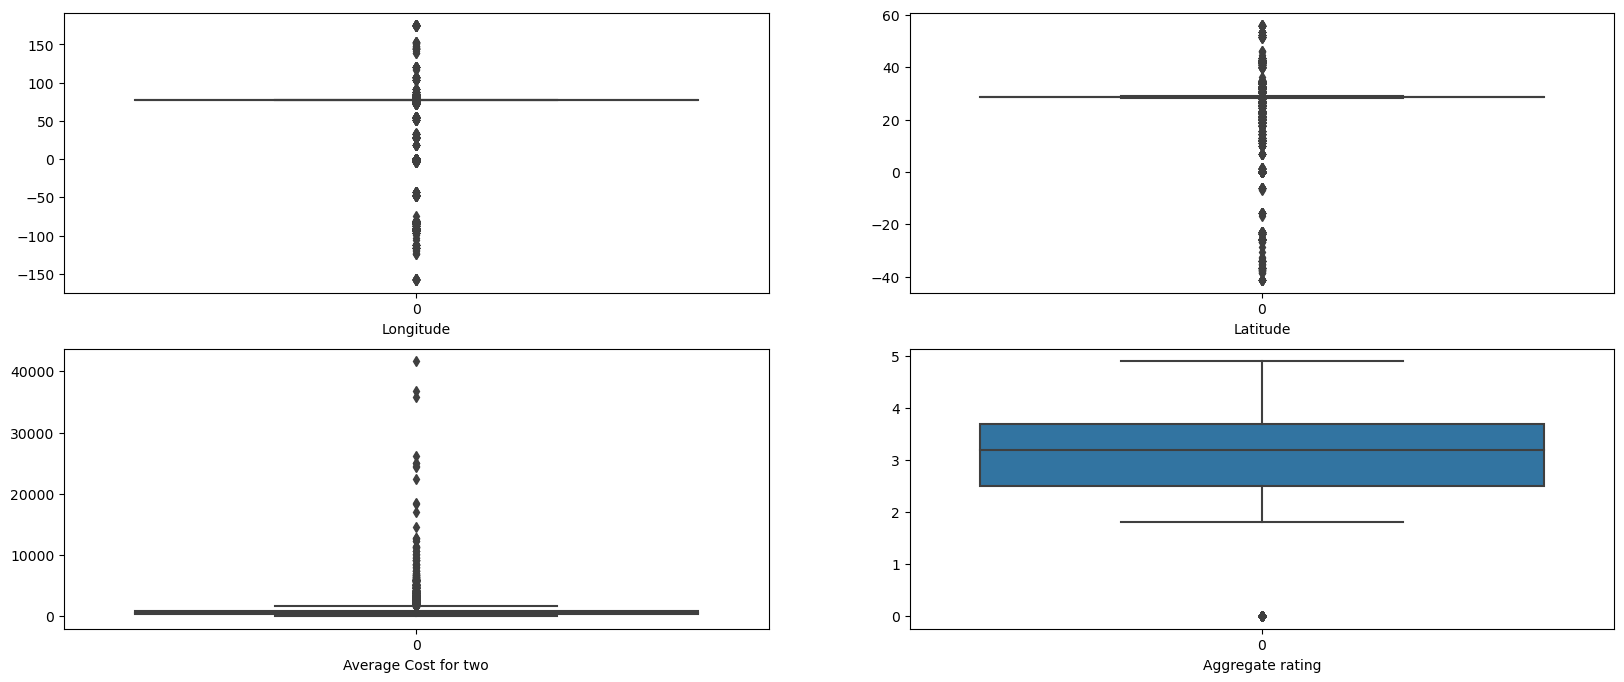

In [192]:
# Checking outliers
plt.figure(figsize =(20, 8))
plotnumber =1

for i in num_cols:
    if plotnumber <= 4:
        plt.subplot(2, 2, plotnumber)
        sns.boxplot(df[i])
        plt.xlabel(i)
    plotnumber+=1
plt.show()

In [193]:
# Removing outlier using zscore
df_zscore =df[['Longitude', 'Latitude', 'Aggregate rating']]
z =np.abs(zscore(df_zscore))
df =df[(z < 3).all(axis =1)]
df.shape

(8930, 21)

In [194]:
# Checking skewness in the dataset
df[num_cols].skew()

Longitude               -3.176909
Latitude                -2.243862
Average Cost for two    13.498042
Aggregate rating        -0.899294
dtype: float64

In [195]:
# Removing skewness from the dataset
df['Longitude'], _ =stats.yeojohnson(df['Longitude'])
df['Latitude'], _ =stats.yeojohnson(df['Latitude'])
df['Average Cost for two'],_ =stats.yeojohnson(df['Average Cost for two'])
df['Aggregate rating'],_ =stats.yeojohnson(df['Aggregate rating'])

In [196]:
df[num_cols].skew()

Longitude              -0.936474
Latitude                0.320521
Average Cost for two   -0.032407
Aggregate rating       -0.613646
dtype: float64

In [197]:
# Encoding categorical columns into numerical 
OE =OrdinalEncoder()

for i in df:
    if df[i].dtypes =='object':
        df[i] =OE.fit_transform(df[i].values.reshape(-1, 1))
        
df

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
5865,4198.0,1,46.0,8150.0,566.0,577.0,7387.547002,197.191070,184.0,5.556639,...,0.0,1.0,0.0,0.0,1,6.191430,2.0,0.0,31,0.0
5895,622.0,1,46.0,108.0,566.0,577.0,7387.887667,197.171321,1072.0,6.723282,...,0.0,0.0,0.0,0.0,3,8.851952,1.0,5.0,937,0.0
3436,5727.0,1,46.0,1548.0,209.0,215.0,7401.477819,195.300065,52.0,7.090451,...,1.0,1.0,0.0,0.0,4,7.624668,5.0,2.0,984,0.0
2136,3283.0,1,25.0,3599.0,842.0,895.0,7372.751224,194.404525,1263.0,5.747062,...,0.0,0.0,0.0,0.0,2,0.000000,4.0,3.0,1,0.0
2289,622.0,1,26.0,1364.0,916.0,971.0,10821.740055,169.206552,1049.0,6.669844,...,0.0,0.0,0.0,0.0,4,11.514584,0.0,1.0,774,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999,3296.0,1,46.0,2335.0,481.0,489.0,7403.678320,195.938901,600.0,5.309696,...,0.0,1.0,0.0,0.0,1,8.229474,5.0,2.0,200,0.0
6328,2287.0,1,46.0,3612.0,637.0,648.0,7384.197411,197.422714,98.0,4.958982,...,0.0,0.0,0.0,0.0,1,0.000000,4.0,3.0,0,0.0
1492,6645.0,1,25.0,1389.0,296.0,302.0,7375.777868,194.590695,1520.0,6.195852,...,0.0,1.0,0.0,0.0,2,7.328960,5.0,2.0,241,0.0
5519,4502.0,1,46.0,7741.0,545.0,556.0,0.000000,0.000000,1020.0,5.747062,...,0.0,0.0,0.0,0.0,2,5.650278,2.0,0.0,4,0.0


In [198]:
# Resetting index
df.reset_index(drop =True, inplace =True)

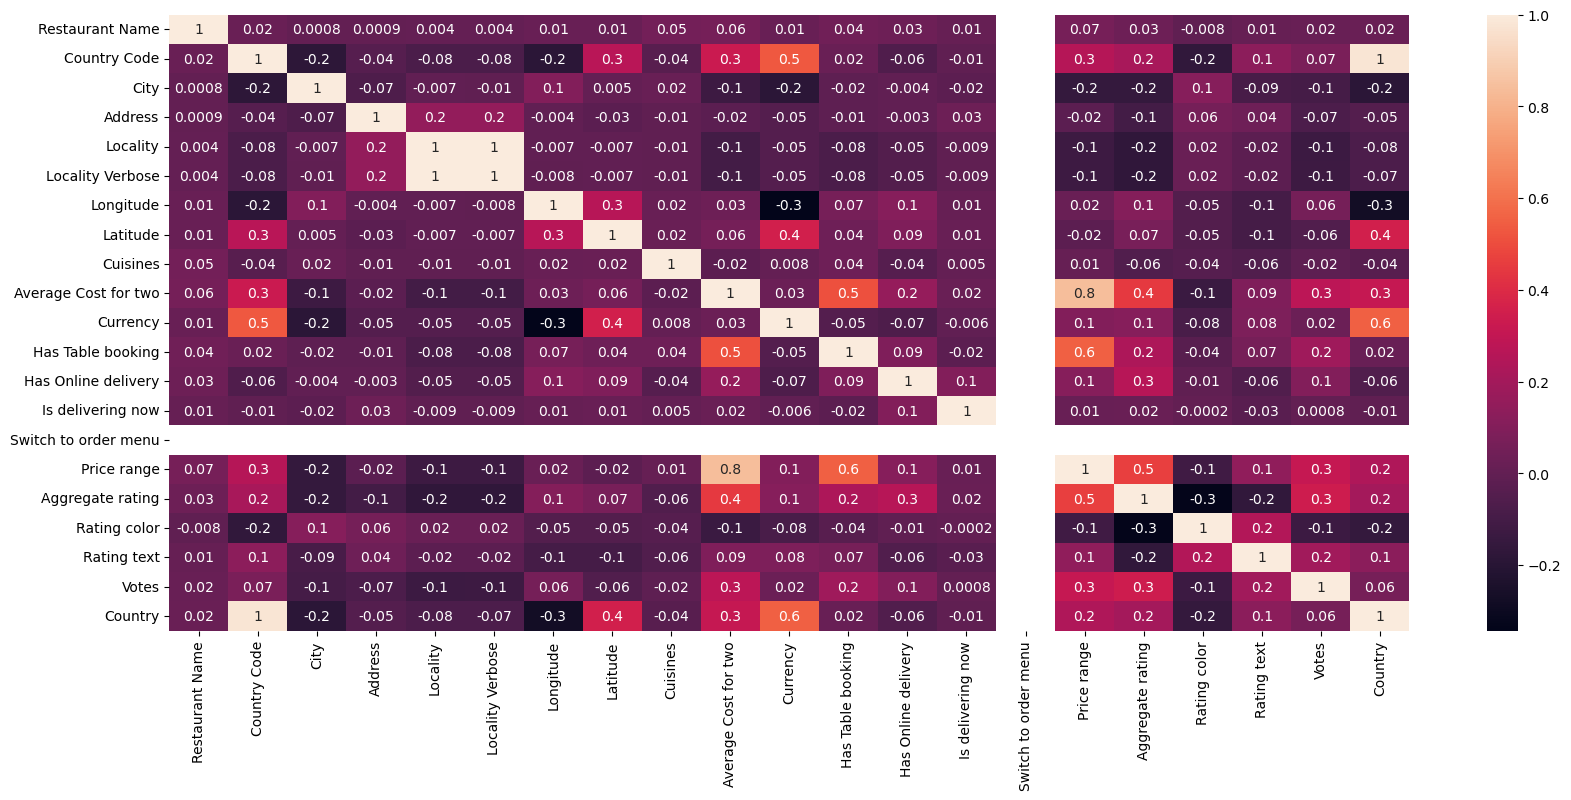

In [199]:
# Plotting heatmap
plt.figure(figsize =(20, 8))
sns.heatmap(df.corr(), annot =True, fmt ='.1g')
plt.show()

__We found multicollinearity between:__
     1. Country Code and Country
     2. Locality and Locality Verbose
     3. Average cost for two and price range

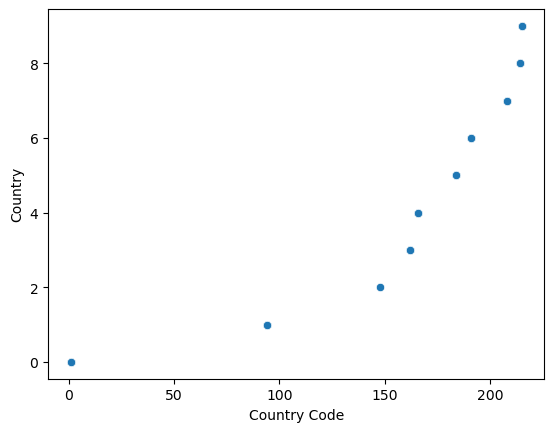

In [200]:
# Plotting scatterplot to confirm multicollinearity
sns.scatterplot(x ='Country Code', y='Country', data =df)
plt.show()

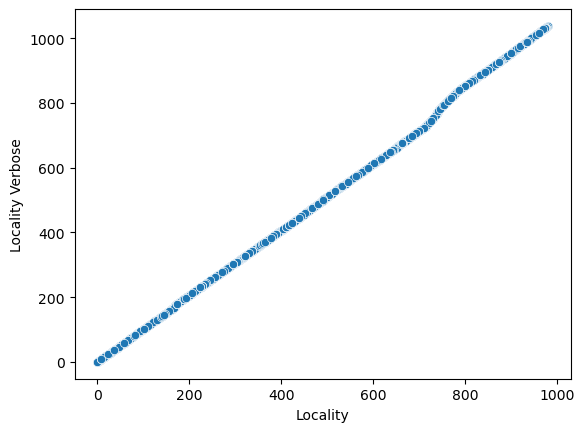

In [201]:
# Plotting scatterplot to confirm multicollinearity
sns.scatterplot(x ='Locality', y='Locality Verbose', data =df)
plt.show()

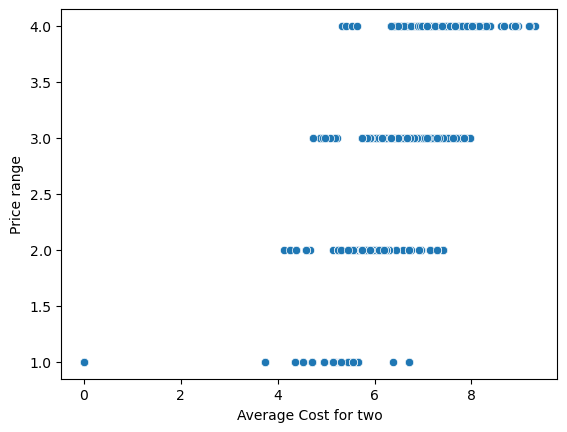

In [202]:
# Plotting scatterplot to confirm multicollinearity
sns.scatterplot(x ='Average Cost for two', y='Price range', data =df)
plt.show()

In [203]:
# We will delete 'Country Code' and 'Locality Verbose'
df.drop(columns =['Country Code', 'Locality Verbose'], inplace =True)

In [204]:
# Seperating Features and label
x =df.drop(columns =['Price range'])
y =df[['Price range']]

In [205]:
# Data Standardization
scaler =StandardScaler()
x =pd.DataFrame(scaler.fit_transform(x), columns =x.columns)
x

,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes,Country
0,0.434935,0.451588,1.651136,0.111504,0.207225,0.237498,-1.407816,-0.225894,-0.091403,-0.385617,1.625857,-0.061822,0.0,0.328334,-0.699035,-1.030806,-0.262149,-0.167172
1,-1.385627,0.451588,-1.725392,0.111504,0.207386,0.237189,0.611058,1.409370,-0.091403,-0.385617,-0.615060,-0.061822,0.0,1.165680,-1.395030,1.993407,1.852225,-0.167172
2,1.213357,0.451588,-1.120791,-1.312215,0.213790,0.207910,-1.707919,1.924025,-0.091403,2.593244,1.625857,-0.061822,0.0,0.779417,1.388951,0.178879,1.961911,-0.167172
3,-0.030897,-1.486626,-0.259655,1.212195,0.200252,0.193898,1.045298,0.041019,-0.091403,-0.385617,-0.615060,-0.061822,0.0,-1.620295,0.692955,0.783722,-0.332161,-0.167172
4,-1.385627,-1.394330,-1.198046,1.507307,1.825656,-0.200359,0.558767,1.334468,-0.091403,-0.385617,-0.615060,-0.061822,0.0,2.003690,-2.091025,-0.425964,1.471825,-0.167172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8925,-0.024278,0.451588,-0.790360,-0.227477,0.214827,0.217906,-0.462037,-0.572030,-0.091403,-0.385617,1.625857,-0.061822,0.0,0.969767,1.388951,0.178879,0.132254,-0.167172
8926,-0.537966,0.451588,-0.254197,0.394653,0.205646,0.241122,-1.603338,-1.063620,-0.091403,-0.385617,-0.615060,-0.061822,0.0,-1.620295,0.692955,0.783722,-0.334495,-0.167172
8927,1.680716,-1.486626,-1.187549,-0.965259,0.201679,0.196811,1.629589,0.670080,-0.091403,-0.385617,1.625857,-0.061822,0.0,0.686348,1.388951,0.178879,0.227938,-0.167172
8928,0.589703,0.451588,1.479413,0.027756,-3.274302,-2.847832,0.492835,0.041019,-0.091403,-0.385617,-0.615060,-0.061822,0.0,0.158017,-0.699035,-1.030806,-0.325160,-0.167172


In [206]:
# Checking vif score
vif =pd.DataFrame()
vif['VIF Score'] =[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] =x.columns
vif

,VIF Score,Features
0,1.008070,Restaurant Name
1,1.101603,City
2,1.044726,Address
3,1.064165,Locality
4,1.565484,Longitude
5,1.665291,Latitude
6,1.022336,Cuisines
7,1.876379,Average Cost for two
8,1.821413,Currency
9,1.420203,Has Table booking


__We will delete 'Switch to order menu' as the vif score in NaN.__

In [207]:
x.drop(columns =['Switch to order menu'], inplace =True)

In [208]:
x

,Restaurant Name,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country
0,0.434935,0.451588,1.651136,0.111504,0.207225,0.237498,-1.407816,-0.225894,-0.091403,-0.385617,1.625857,-0.061822,0.328334,-0.699035,-1.030806,-0.262149,-0.167172
1,-1.385627,0.451588,-1.725392,0.111504,0.207386,0.237189,0.611058,1.409370,-0.091403,-0.385617,-0.615060,-0.061822,1.165680,-1.395030,1.993407,1.852225,-0.167172
2,1.213357,0.451588,-1.120791,-1.312215,0.213790,0.207910,-1.707919,1.924025,-0.091403,2.593244,1.625857,-0.061822,0.779417,1.388951,0.178879,1.961911,-0.167172
3,-0.030897,-1.486626,-0.259655,1.212195,0.200252,0.193898,1.045298,0.041019,-0.091403,-0.385617,-0.615060,-0.061822,-1.620295,0.692955,0.783722,-0.332161,-0.167172
4,-1.385627,-1.394330,-1.198046,1.507307,1.825656,-0.200359,0.558767,1.334468,-0.091403,-0.385617,-0.615060,-0.061822,2.003690,-2.091025,-0.425964,1.471825,-0.167172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8925,-0.024278,0.451588,-0.790360,-0.227477,0.214827,0.217906,-0.462037,-0.572030,-0.091403,-0.385617,1.625857,-0.061822,0.969767,1.388951,0.178879,0.132254,-0.167172
8926,-0.537966,0.451588,-0.254197,0.394653,0.205646,0.241122,-1.603338,-1.063620,-0.091403,-0.385617,-0.615060,-0.061822,-1.620295,0.692955,0.783722,-0.334495,-0.167172
8927,1.680716,-1.486626,-1.187549,-0.965259,0.201679,0.196811,1.629589,0.670080,-0.091403,-0.385617,1.625857,-0.061822,0.686348,1.388951,0.178879,0.227938,-0.167172
8928,0.589703,0.451588,1.479413,0.027756,-3.274302,-2.847832,0.492835,0.041019,-0.091403,-0.385617,-0.615060,-0.061822,0.158017,-0.699035,-1.030806,-0.325160,-0.167172


# EDA Completed

## Model Building

### Finding best random state

In [209]:
maxrs =0
maxacc =0

for i in range(1, 200):
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =i)
    RFR =RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred =RFR.predict(x_test)
    acc =accuracy_score(y_test, pred)
    
    if acc > maxacc:
        maxacc =acc
        maxrs =i
        
print("Maximum accuracy is :", acc*100, "at random state :", maxrs)

Maximum accuracy is : 97.87234042553192 at random state : 179


In [210]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size =0.3, random_state =maxrs)

In [214]:
# Initializing models
RFC =RandomForestClassifier()
ETC =ExtraTreesClassifier()
svc =SVC()
GBC =GradientBoostingClassifier()
ABC =AdaBoostClassifier()
BC =BaggingClassifier()
DTC =DecisionTreeClassifier()

In [215]:
# Initializing Models

models ={'RandomForestClassifier' :RFC,
        'ExtraTressClassifier' : ETC,
         'SVC' :svc,
        'GradientBoostingClassifier' :GBC,
        'AdaBoostClassifier' :ABC,
        'BaggingClassifier' :BC,
        'DecisionTreeClassifier' :DTC,
        }

for name, model in models.items():
    model.fit(x_train, y_train)
    pred_test =model.predict(x_test)
    pred_train =model.predict(x_train)
    acc =accuracy_score(y_test, pred_test)
    
    print("Model Name :", name)
    print("*"*35)
    print("Accuracy on Training data :", (accuracy_score(y_train, pred_train))*100)
    print("Accuracy on Test data :", (accuracy_score(y_test, pred_test))*100)
    print("Confusion Matrix :\n", confusion_matrix(y_test, pred_test))
    print('Classification Report :\n', classification_report(y_test, pred_test))
    
    print('\n')
    print("Cross Validation for the model :", name)
    print("*"*30)
    score =cross_val_score(model, x, y, cv=5)
    print(score)
    print(score.mean())
    print("Difference between accuracy of the model and cross validation is :", (acc -(score.mean()))*100)
    print("="*80)
    print('\n')

Model Name : RandomForestClassifier
***********************************
Accuracy on Training data : 100.0
Accuracy on Test data : 97.83501306457634
Confusion Matrix :
 [[1264    1    0    0]
 [  10  894   10    0]
 [   0   14  341    8]
 [   0    0   15  122]]
Classification Report :
               precision    recall  f1-score   support

           1       0.99      1.00      1.00      1265
           2       0.98      0.98      0.98       914
           3       0.93      0.94      0.94       363
           4       0.94      0.89      0.91       137

    accuracy                           0.98      2679
   macro avg       0.96      0.95      0.96      2679
weighted avg       0.98      0.98      0.98      2679



Cross Validation for the model : RandomForestClassifier
******************************
[0.97536394 0.9787234  0.97760358 0.97256439 0.97536394]
0.9759238521836504
Difference between accuracy of the model and cross validation is : 0.2426278462112963


Model Name : ExtraTressCla

__GradientBoostingClassifier is our best model with the accuracy of 98.39%.__

# Hyperparameter Tunning

In [221]:
parameters ={'n_estimators' :[50, 100, 200],
            'learning_rate' :[.01, 0.1, 0.2],
            'max_depth' :[3, 5, 7]}

In [222]:
GCV =GridSearchCV(GradientBoostingClassifier(), parameters, cv =5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [225]:
GCV.best_params_

{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}

In [226]:
Final_model =GradientBoostingClassifier(learning_rate =0.2, max_depth =7, n_estimators =100)
Final_model.fit(x_train, y_train)
pred =Final_model.predict(x_test)
acc =accuracy_score(y_test, pred)
print("Accuracy is :", acc*100)

Accuracy is : 98.65621500559911


__Accuracy increased after hyperparameter tunning.__

In [227]:
# Saving the model
pickle.dump(Final_model, open('Price Range.pkl', 'wb'))

In [228]:
# Loading the model
loaded_model =pickle.load(open('Price Range.pkl', 'rb'))
loaded_model.fit(x_train, y_train)
pred =loaded_model.predict(x_test)
acc =accuracy_score(y_test, pred)
print("Accuracy is :", acc*100)

Accuracy is : 98.61888764464352


In [229]:
# Comparing Actual Vs Predicted
act =np.array(y_test)
df1 =pd.DataFrame()
df1['Predicted'] =pred
df1['Actual'] =act
df1

,Predicted,Actual
0,4,4
1,1,1
2,2,2
3,1,1
4,1,1
...,...,...
2674,2,2
2675,3,3
2676,2,2
2677,1,1
